In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import datetime

import matplotlib as mpl
fp = mpl.font_manager.FontProperties(family='Tahoma',size=13)

%matplotlib inline

# Import Data

In [2]:
#df = pd.read_csv('chaiyo_encode_data.csv', index_col=0)
df = pd.read_csv('chaiyo_clean_90_v2.csv', index_col=0)
df

Principal Approve Amount  Principal Amount  \
0                     199000.0         199000.00   
1                      60000.0          58822.04   
2                      36000.0          35904.37   
3                      30000.0          28813.69   
4                     200000.0         200000.00   
...                        ...               ...   
4024                   14000.0          14000.00   
4025                   45000.0          45000.00   
4027                  144000.0         144000.00   
4029                   39000.0          39000.00   
4030                  300000.0         300000.00   

      Repayment Tenor Month Number Gender Occupation Description  \
0                               60      F          STREET VENDOR   
1                               36      M                  อื่นๆ   
2                               24      F          พนักงานบริษัท   
3                               24      F                เกษตรกร   
4                               36      M          พนักงานบริษัท   
...                            ...    ...                    ...   
4024                            12      F          STREET VENDOR   
4025                            18      F          พนักงานบริษัท   
4027                            60      M              ข้าราชการ   
4029                            36      F          พนักงานบริษัท   
4030                            60      F                เกษตรกร   

      Total Income Amount (Month) Collateral Type Code Vehicle Brand  \
0                         20000.0                   PU        NISSAN   
1                         14000.0                  CAR        TOYOTA   
2                         15000.0                   MC         HONDA   
3                         35000.0                   MC         HONDA   
4                         40000.0                   PU         ISUZU   
...                           ...                  ...           ...   
4024                      15000.0                   MC        YAMAHA   
4025                      40000.0                   MC         HONDA   
4027                      36000.0                  CAR        TOYOTA   
4029                      15000.0                   MC         HONDA   
4030                      20000.0                   PU        NISSAN   

        Vehicle Model  Vehicle Release Year Vehicle Sub Model  \
0     FRONTIER NAVARA                  2012                AD   
1       COROLLA ALTIS                  2002                AJ   
2          CLICK 150I                  2019                BH   
3             PCX 150                  2020                ED   
4               D-MAX                  2013                BU   
...               ...                   ...               ...   
4024     FINO (MLEKE)                  2009                AH   
4025          PCX 150                  2017                CQ   
4027             VIOS                  2010                DX   
4029       DREAM 110I                  2017                CO   
4030           NAVARA                  2019                DQ   

      Evaluation Amount System CAR Code (Daily) System CAR Code Date  \
0                283500                      S1           14/11/2022   
1                111000                      S1             6/9/2022   
2                 48500                      S1           30/12/2022   
3                 76500                      S1           12/11/2022   
4                414500                      S1           29/12/2022   
...                 ...                     ...                  ...   
4024              23000                      S3           24/12/2022   
4025              61500                      S3           27/12/2022   
4027             222000                      S3           29/12/2022   
4029              53000                      S3           29/12/2022   
4030             484500                      S3           29/12/2022   

     Final CAR Code Previous Month  DPD  age  Vehicle

In [3]:
df = df.rename(columns=lambda x: x.strip().replace(' ', '_'))
df.head()

Principal_Approve_Amount  Principal_Amount  Repayment_Tenor_Month_Number  \
0                  199000.0         199000.00                            60   
1                   60000.0          58822.04                            36   
2                   36000.0          35904.37                            24   
3                   30000.0          28813.69                            24   
4                  200000.0         200000.00                            36   

  Gender Occupation_Description  Total_Income_Amount_(Month)  \
0      F          STREET VENDOR                      20000.0   
1      M                  อื่นๆ                      14000.0   
2      F          พนักงานบริษัท                      15000.0   
3      F                เกษตรกร                      35000.0   
4      M          พนักงานบริษัท                      40000.0   

  Collateral_Type_Code Vehicle_Brand    Vehicle_Model  Vehicle_Release_Year  \
0                   PU        NISSAN  FRONTIER NAVARA                  2012   
1                  CAR        TOYOTA    COROLLA ALTIS                  2002   
2                   MC         HONDA       CLICK 150I                  2019   
3                   MC         HONDA          PCX 150                  2020   
4                   PU         ISUZU            D-MAX                  2013   

  Vehicle_Sub_Model  Evaluation_Amount System_CAR_Code_(Daily)  \
0                AD             283500                      S1   
1                AJ             111000                      S1   
2                BH              48500                      S1   
3                ED              76500                      S1   
4                BU             414500                      S1   

  System_CAR_Code_Date Final_CAR_Code_Previous_Month DPD  age  Vehicle_Age  \
0           14/11/2022                            S1  PL   44           11   
1             6/9/2022                            S1  PL   53           21   
2           30/12/2022                            S2  PL   32            4   
3           12/11/2022                            S1  PL   37            3   
4           29/12/2022                            S1  PL   57           10   

     per_LTV per_LTV_cate  
0  70.194004       65-75%  
1  54.054054       50-65%  
2  74.226804       65-75%  
3  39.215686       30-50%  
4  48.250905       30-50%

In [4]:
category = ['Gender','Occupation_Description','Collateral_Type_Code','Vehicle_Brand','Vehicle_Model']

for i in category:
    print(f'{i}:{df[i].unique()}\n')

Gender:['F' 'M']

Occupation_Description:['STREET VENDOR' 'อื่นๆ' 'พนักงานบริษัท' 'เกษตรกร' 'ข้าราชการ'
 'เลี้ยงสัตว์' 'บุคลากรทางการแพทย์' 'อาจารย์' 'พนักงานรัฐวิสาหกิจ']

Collateral_Type_Code:['PU' 'CAR' 'MC' 'VAN' 'TRUCK']

Vehicle_Brand:['NISSAN' 'TOYOTA' 'HONDA' 'ISUZU' 'YAMAHA' 'MITSUBISHI' 'MAZDA' 'SUZUKI'
 'KAWASAKI' 'FORD' 'RYUKA' 'VESPA' 'GPX' 'HINO' 'MG' 'CHEVROLET' 'TATA'
 'KIA' 'STALLION' 'HYUNDAI' 'PROTON' 'LAMBRETTA' 'BENELLI']

Vehicle_Model:['FRONTIER NAVARA' 'COROLLA ALTIS' 'CLICK 150I' 'PCX 150' 'D-MAX'
 'HILUX TIGER' 'SCOOPY I' 'WAVE 110 I' 'MARCH' 'TTX 115' 'WAVE X'
 'DREAM 110' 'GRAND FILANO 125' 'HILUX VIGO' 'ALMERA' 'VIOS' 'TRITON'
 'CITY' 'MIO 115' 'MSX 125' 'M-SLAZ 150' 'CIVIC' 'CLICK 125I' 'CAMRY'
 'MT 15' 'CB 150' 'SUPER CUB 110' 'WAVE 125 I' 'FINO (MLEKE)' 'XTRAIL'
 'DREAM 110I' 'COROLLA' 'WAVE 100' 'BT-50' 'PCX 160' 'JAZZ' 'CR-V'
 'SMASH 115' 'CIAZ' 'QBIX 125 S' 'CLICK 110' 'AEROX 155' 'ER6N 650'
 'NP300' 'WAVE 125' 'WAVE 125 X' 'MIRAGE' 'MIO 125' 'SWIFT' 

In [5]:
df[df['DPD']=='PL'].shape

(3355, 20)

In [6]:
df[df['DPD']=='NPL'].shape

(55, 20)

In [7]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Occupation_Description','Collateral_Type_Code','Vehicle_Brand','Vehicle_Model','System_CAR_Code_(Daily)','Final_CAR_Code_Previous_Month']

le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [8]:
category = ['Gender','Occupation_Description','Collateral_Type_Code','Vehicle_Brand','Vehicle_Model']

for i in category:
    print(f'{i}:{df[i].unique()}\n')

Gender:[0 1]

Occupation_Description:[0 6 3 7 1 8 2 5 4]

Collateral_Type_Code:[2 0 1 4 3]

Vehicle_Brand:[14 20  5  7 22 13 11 18  8  2 16 21  3  4 12  1 19  9 17  6 15 10  0]

Vehicle_Model:[ 78  39  34 133  49  89 154 190 108 185 196  54  81  90   6 188 184  28
 110 117 107  29  33  14 118  18 175 193  71 201  55  38 189  12 135  93
  42 161  27 143  31   4  60 129 192 194 114 112 177   0  76  70   2  35
   7 144 202 155  45  13 106  77 100 102  64 119  16   3  19 176  86  52
  69 134 191 153  83 162  53  65  51  68  32 121 164  37  72 109 171 179
 174  66  30 198 103 208  10  73 120  99  63  74 159 169 204  96  36   1
 199 149  79  75 131 123 116  48   5 148  97 168 127 200  88  92 206 203
 195  82 139 167 141 178  67  91 130 163   8 197  17  43 105 166 180  59
   9 113 128  15 126  44  50  98 138 137  11 173 186  26 115  56  23 142
 205  47 182  80  58 147 152  94 101  85  25 122 157 170  84  46 165 156
 172 111  40  87 136 146  22 124  57 140 150 160  24 104  41 151  95 181
 145 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3410 entries, 0 to 4030
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Principal_Approve_Amount       3410 non-null   float64
 1   Principal_Amount               3410 non-null   float64
 2   Repayment_Tenor_Month_Number   3410 non-null   int64  
 3   Gender                         3410 non-null   int32  
 4   Occupation_Description         3410 non-null   int32  
 5   Total_Income_Amount_(Month)    3410 non-null   float64
 6   Collateral_Type_Code           3410 non-null   int32  
 7   Vehicle_Brand                  3410 non-null   int32  
 8   Vehicle_Model                  3410 non-null   int32  
 9   Vehicle_Release_Year           3410 non-null   int64  
 10  Vehicle_Sub_Model              3410 non-null   object 
 11  Evaluation_Amount              3410 non-null   int64  
 12  System_CAR_Code_(Daily)        3410 non-null   i

In [10]:
df.describe().round(2)

Principal_Approve_Amount  Principal_Amount  \
count                   3410.00           3410.00   
mean                   75629.66          74669.25   
std                    79271.47          79109.90   
min                     3000.00           1583.59   
25%                    22525.00          21643.71   
50%                    30000.00          29975.93   
75%                   125750.00         124864.20   
max                   314000.00         314000.00   

       Repayment_Tenor_Month_Number   Gender  Occupation_Description  \
count                       3410.00  3410.00                 3410.00   
mean                          36.55     0.45                    3.61   
std                           16.23     0.50                    2.61   
min                           12.00     0.00                    0.00   
25%                           24.00     0.00                    1.00   
50%                           36.00     0.00                    3.00   
75%                           60.00     1.00                    6.00   
max                           60.00     1.00                    8.00   

       Total_Income_Amount_(Month)  Collateral_Type_Code  Vehicle_Brand  \
count                      3410.00               3410.00        3410.00   
mean                      19168.37                  1.03          10.15   
std                        7843.54                  0.66           7.03   
min                        6500.00                  0.00           0.00   
25%                       13500.00                  1.00           5.00   
50%                       18000.00                  1.00           5.00   
75%                       24805.00                  1.00          20.00   
max                       41308.00                  4.00          22.00   

       Vehicle_Model  Vehicle_Release_Year  Evaluation_Amount  \
count        3410.00               3410.00            3410.00   
mean          121.26               2012.75          120642.87   
std            64.95                  5.32          122898.83   
min             0.00               1990.00           10000.00   
25%            55.00               2009.00           35000.00   
50%           132.50               2013.00           44000.00   
75%           190.00               2017.00          209375.00   
max           208.00               2022.00          831000.00   

       System_CAR_Code_(Daily)  Final_CAR_Code_Previous_Month      age  \
count                  3410.00                         3410.0  3410.00   
mean                      0.29                            0.1    41.23   
std                       0.51                            0.3    10.71   
min                       0.00                            0.0    21.00   
25%                       0.00                            0.0    33.00   
50%                       0.00                            0.0    40.00   
75%                       1.00                            0.0    49.00   
max                       2.00                            2.0    72.00   

       Vehicle_Age  per_LTV  
count      3410.00  3410.00  
mean         10.25    66.04  
std           5.32    23.76  
min           1.00     3.02  
25%           6.00    62.86  
50%          10.00    71.43  
75%          14.00    74.88  
max          33.00   657.14

In [11]:
df.columns

Index(['Principal_Approve_Amount', 'Principal_Amount',
       'Repayment_Tenor_Month_Number', 'Gender', 'Occupation_Description',
       'Total_Income_Amount_(Month)', 'Collateral_Type_Code', 'Vehicle_Brand',
       'Vehicle_Model', 'Vehicle_Release_Year', 'Vehicle_Sub_Model',
       'Evaluation_Amount', 'System_CAR_Code_(Daily)', 'System_CAR_Code_Date',
       'Final_CAR_Code_Previous_Month', 'DPD', 'age', 'Vehicle_Age', 'per_LTV',
       'per_LTV_cate'],
      dtype='object')

In [12]:
df.head(5)

Principal_Approve_Amount  Principal_Amount  Repayment_Tenor_Month_Number  \
0                  199000.0         199000.00                            60   
1                   60000.0          58822.04                            36   
2                   36000.0          35904.37                            24   
3                   30000.0          28813.69                            24   
4                  200000.0         200000.00                            36   

   Gender  Occupation_Description  Total_Income_Amount_(Month)  \
0       0                       0                      20000.0   
1       1                       6                      14000.0   
2       0                       3                      15000.0   
3       0                       7                      35000.0   
4       1                       3                      40000.0   

   Collateral_Type_Code  Vehicle_Brand  Vehicle_Model  Vehicle_Release_Year  \
0                     2             14             78                  2012   
1                     0             20             39                  2002   
2                     1              5             34                  2019   
3                     1              5            133                  2020   
4                     2              7             49                  2013   

  Vehicle_Sub_Model  Evaluation_Amount  System_CAR_Code_(Daily)  \
0                AD             283500                        0   
1                AJ             111000                        0   
2                BH              48500                        0   
3                ED              76500                        0   
4                BU             414500                        0   

  System_CAR_Code_Date  Final_CAR_Code_Previous_Month DPD  age  Vehicle_Age  \
0           14/11/2022                              0  PL   44           11   
1             6/9/2022                              0  PL   53           21   
2           30/12/2022                              1  PL   32            4   
3           12/11/2022                              0  PL   37            3   
4           29/12/2022                              0  PL   57           10   

     per_LTV per_LTV_cate  
0  70.194004       65-75%  
1  54.054054       50-65%  
2  74.226804       65-75%  
3  39.215686       30-50%  
4  48.250905       30-50%

In [13]:
df.describe().round(2)

Principal_Approve_Amount  Principal_Amount  \
count                   3410.00           3410.00   
mean                   75629.66          74669.25   
std                    79271.47          79109.90   
min                     3000.00           1583.59   
25%                    22525.00          21643.71   
50%                    30000.00          29975.93   
75%                   125750.00         124864.20   
max                   314000.00         314000.00   

       Repayment_Tenor_Month_Number   Gender  Occupation_Description  \
count                       3410.00  3410.00                 3410.00   
mean                          36.55     0.45                    3.61   
std                           16.23     0.50                    2.61   
min                           12.00     0.00                    0.00   
25%                           24.00     0.00                    1.00   
50%                           36.00     0.00                    3.00   
75%                           60.00     1.00                    6.00   
max                           60.00     1.00                    8.00   

       Total_Income_Amount_(Month)  Collateral_Type_Code  Vehicle_Brand  \
count                      3410.00               3410.00        3410.00   
mean                      19168.37                  1.03          10.15   
std                        7843.54                  0.66           7.03   
min                        6500.00                  0.00           0.00   
25%                       13500.00                  1.00           5.00   
50%                       18000.00                  1.00           5.00   
75%                       24805.00                  1.00          20.00   
max                       41308.00                  4.00          22.00   

       Vehicle_Model  Vehicle_Release_Year  Evaluation_Amount  \
count        3410.00               3410.00            3410.00   
mean          121.26               2012.75          120642.87   
std            64.95                  5.32          122898.83   
min             0.00               1990.00           10000.00   
25%            55.00               2009.00           35000.00   
50%           132.50               2013.00           44000.00   
75%           190.00               2017.00          209375.00   
max           208.00               2022.00          831000.00   

       System_CAR_Code_(Daily)  Final_CAR_Code_Previous_Month      age  \
count                  3410.00                         3410.0  3410.00   
mean                      0.29                            0.1    41.23   
std                       0.51                            0.3    10.71   
min                       0.00                            0.0    21.00   
25%                       0.00                            0.0    33.00   
50%                       0.00                            0.0    40.00   
75%                       1.00                            0.0    49.00   
max                       2.00                            2.0    72.00   

       Vehicle_Age  per_LTV  
count      3410.00  3410.00  
mean         10.25    66.04  
std           5.32    23.76  
min           1.00     3.02  
25%           6.00    62.86  
50%          10.00    71.43  
75%          14.00    74.88  
max          33.00   657.14

In [14]:
#sns.pairplot(df, hue="DPD")

<Figure size 1500x1000 with 0 Axes>

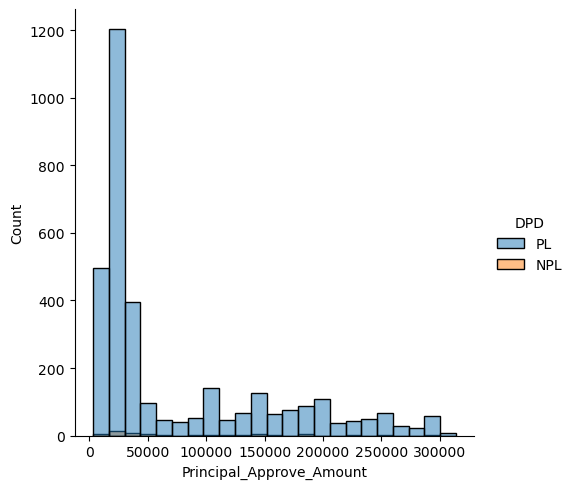

In [15]:
plt.figure(figsize=(15,10))
sns.displot(data=df, x="Principal_Approve_Amount", hue="DPD")

<Figure size 1500x1000 with 0 Axes>

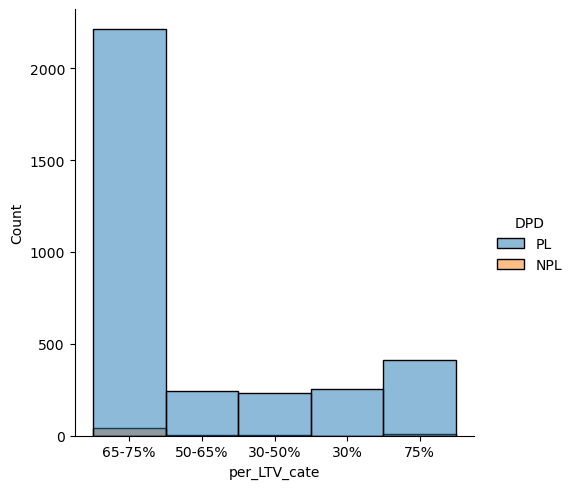

In [16]:
plt.figure(figsize=(15,10))
sns.displot(data=df, x="per_LTV_cate", hue="DPD")

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Principal_Approve_Amount', ylabel='Density'>

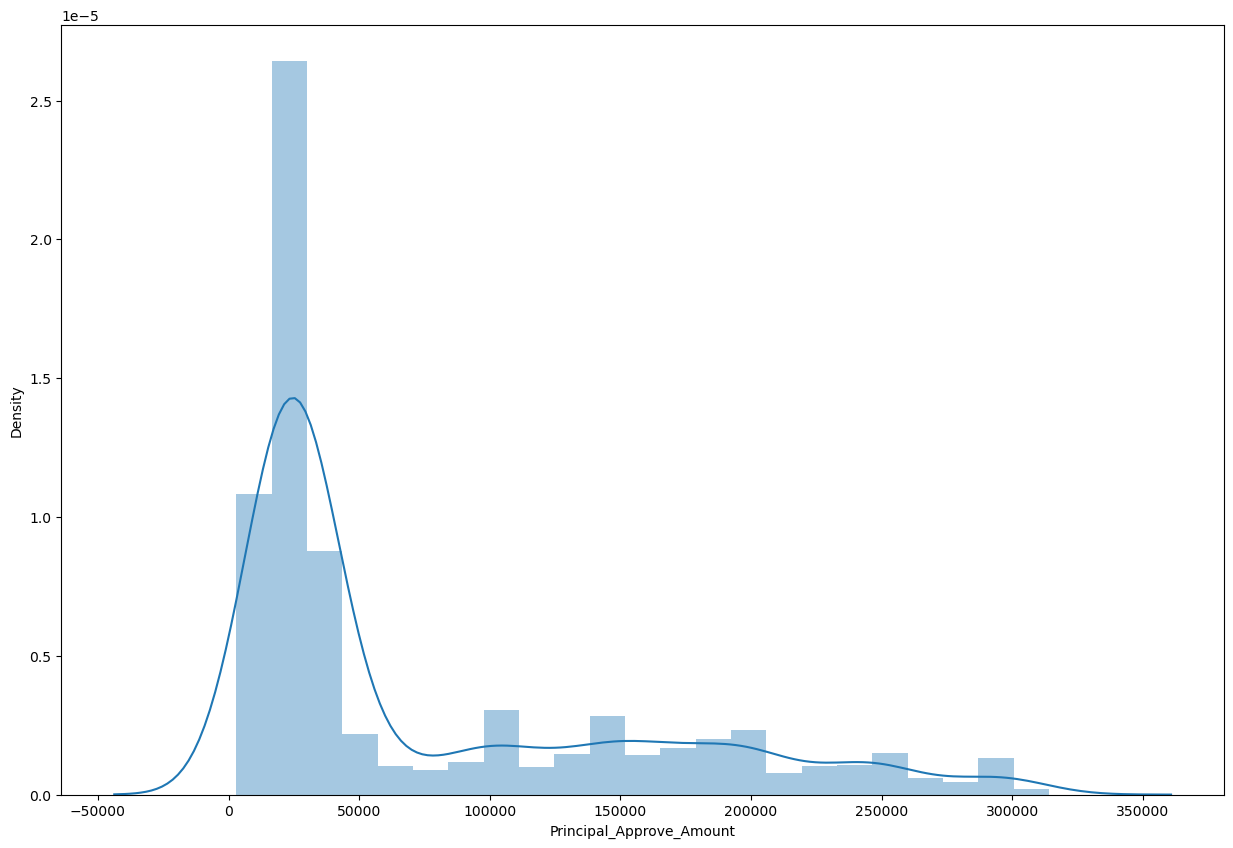

In [17]:
plt.figure(figsize=(15,10))
sns.distplot(df['Principal_Approve_Amount'])

In [18]:
# plt.figure(figsize=(15,10))
# sns.heatmap(df.corr(),annot=True, cmap="BuPu")

In [19]:
df.columns

Index(['Principal_Approve_Amount', 'Principal_Amount',
       'Repayment_Tenor_Month_Number', 'Gender', 'Occupation_Description',
       'Total_Income_Amount_(Month)', 'Collateral_Type_Code', 'Vehicle_Brand',
       'Vehicle_Model', 'Vehicle_Release_Year', 'Vehicle_Sub_Model',
       'Evaluation_Amount', 'System_CAR_Code_(Daily)', 'System_CAR_Code_Date',
       'Final_CAR_Code_Previous_Month', 'DPD', 'age', 'Vehicle_Age', 'per_LTV',
       'per_LTV_cate'],
      dtype='object')

In [20]:
cols = df[['Principal_Approve_Amount', 'Repayment_Tenor_Month_Number', 'Gender', 'Occupation_Description',
       'Total_Income_Amount_(Month)', 'Collateral_Type_Code', 'Vehicle_Brand','Vehicle_Model','Vehicle_Release_Year',
       'Evaluation_Amount','age','Vehicle_Age']]

In [21]:


X = cols
       # test approve กับ ที่ปล่อย
# X2 = df[['Principal Approve Amount', 'Principal Amount',
#        'Repayment Tenor Month Number', 'Gender', 'Occupation Description',
#        'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand',
#        'Vehicle Release Year', 'age', 'Vehicle Age']]
y = df['DPD']

# Train Test Split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [24]:
X_train.shape

(2387, 12)

In [25]:
X_test.shape

(1023, 12)

In [26]:
y_train.shape

(2387,)

In [27]:
y_test.shape

(1023,)

In [28]:
df[df['DPD']=='PL'].shape

(3355, 20)

In [29]:
df[df['DPD']=='NPL'].shape

(55, 20)

In [30]:
y_train.value_counts()

PL     2339
NPL      48
Name: DPD, dtype: int64

In [31]:
y_test.value_counts()

PL     1016
NPL       7
Name: DPD, dtype: int64

<AxesSubplot:title={'center':'Train target'}>

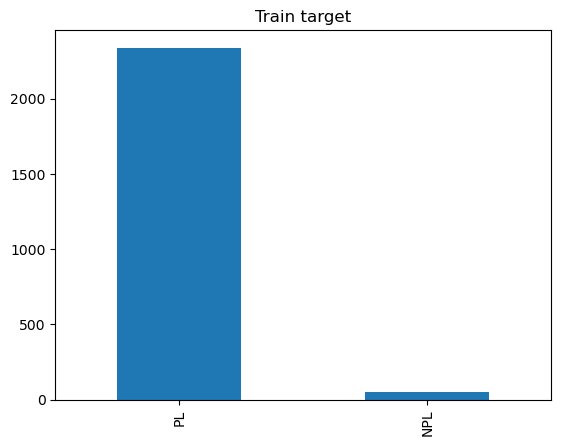

In [32]:
plt.title('Train target')
y_train.value_counts().plot(kind='bar')

In [33]:
df.shape

(3410, 20)

# Imbalance Oversampling SMOTE

In [34]:
#pip install imblearn

In [35]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [36]:
#Fitting SMOTE to the train set
smote = SMOTE(random_state=101)
smote_X_train, smote_y_train = smote.fit_resample(X_train, y_train)

print(sorted(Counter(smote_y_train).items()),smote_y_train.shape)

[('NPL', 2339), ('PL', 2339)] (4678,)


In [37]:
print('Before sampling class distribution : ', Counter(y_train))
print('After sampling class distribution : ', Counter(smote_y_train))

Before sampling class distribution :  Counter({'PL': 2339, 'NPL': 48})
After sampling class distribution :  Counter({'PL': 2339, 'NPL': 2339})


### หาที่มา 1834

In [38]:
df.shape

(3410, 20)

In [39]:
smote_X_train.shape

(4678, 12)

In [40]:
smote_y_train.shape

(4678,)

In [41]:
smote_y_train.value_counts()

PL     2339
NPL    2339
Name: DPD, dtype: int64

In [42]:
y_test.value_counts()

PL     1016
NPL       7
Name: DPD, dtype: int64

<AxesSubplot:title={'center':'Train target'}>

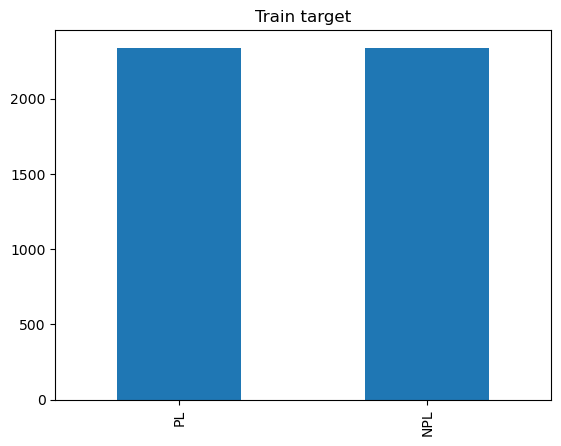

In [43]:
plt.title('Train target')
smote_y_train.value_counts().plot(kind='bar')

<AxesSubplot:title={'center':'Test target'}>

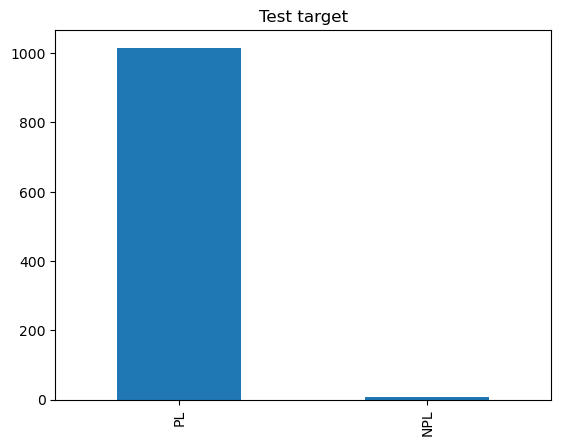

In [44]:
plt.title('Test target')
y_test.value_counts().plot(kind='bar')

## Feature Importance Decisiontree

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


model=DecisionTreeClassifier(criterion='entropy')

model.fit(smote_X_train, smote_y_train)

DecisionTreeClassifier(criterion='entropy')

In [46]:
X = cols
       # test approve กับ ที่ปล่อย
y = df['DPD']

In [47]:
model.feature_importances_

array([0.12634185, 0.06133799, 0.01290522, 0.0678603 , 0.1591706 ,
       0.01001897, 0.04278941, 0.13339484, 0.06256631, 0.15898278,
       0.09466236, 0.06996936])

In [48]:
fs = pd.Series(model.feature_importances_, index=smote_X_train.columns).sort_values(
    ascending=False
)
fs

Total_Income_Amount_(Month)     0.159171
Evaluation_Amount               0.158983
Vehicle_Model                   0.133395
Principal_Approve_Amount        0.126342
age                             0.094662
Vehicle_Age                     0.069969
Occupation_Description          0.067860
Vehicle_Release_Year            0.062566
Repayment_Tenor_Month_Number    0.061338
Vehicle_Brand                   0.042789
Gender                          0.012905
Collateral_Type_Code            0.010019
dtype: float64

In [49]:
fs.sum()

1.0

<AxesSubplot:>

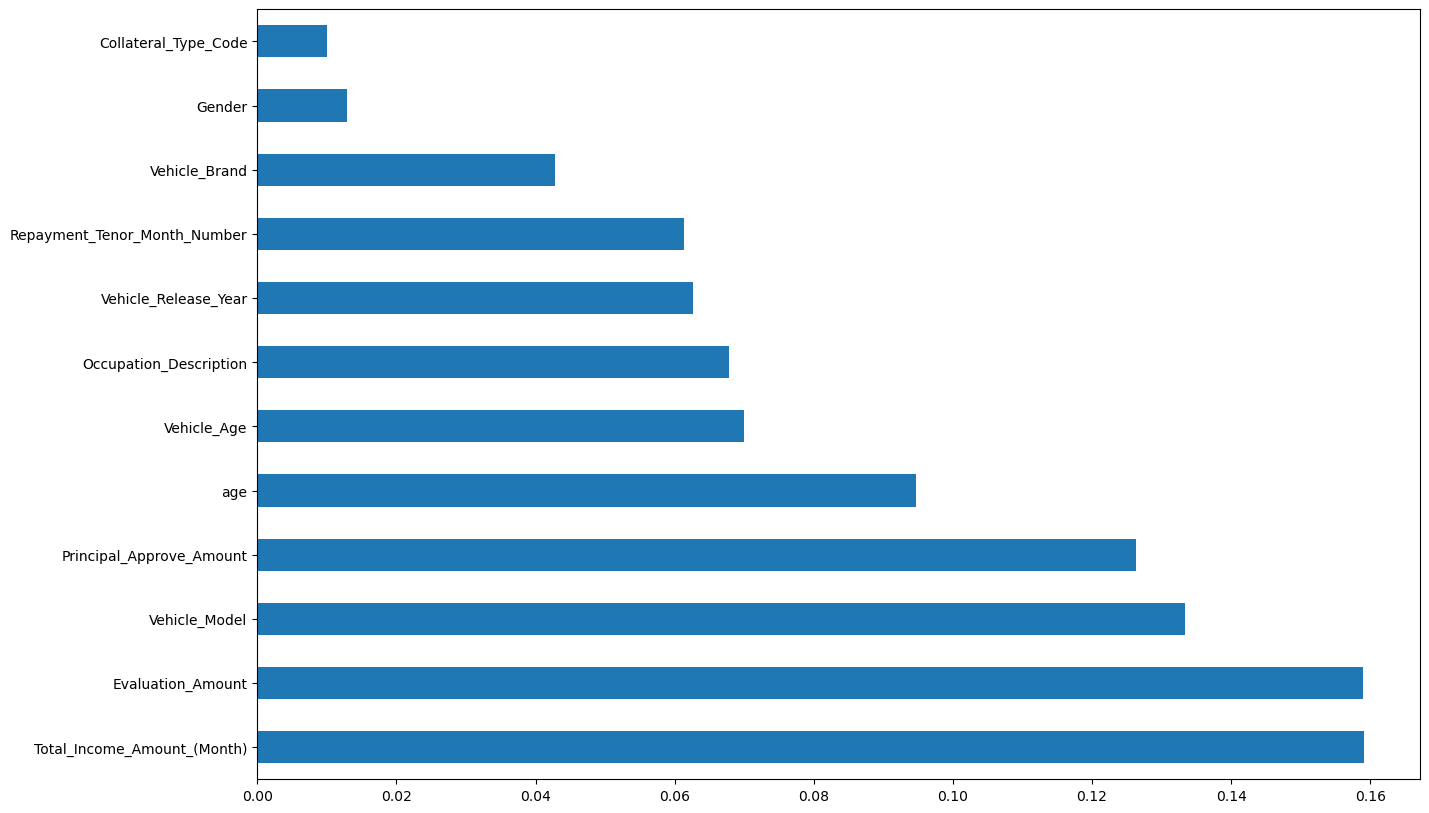

In [50]:
plt.figure(figsize=(15,10))
fs.plot(kind='barh')

## Cross Validation

In [51]:
# from sklearn.model_selection import cross_val_score
# def classify(model, x,y):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
#     model.fit(X_train, y_train)
#     print("Accuracy is : ", model.score(X_test, y_test)*100)
#     #Cross Calidation
#     #eg: cv-5, train-4, test-1
#     score = cross_val_score(model, X, y, cv=10)
#     print(score)
#     print("Cross Validation is ", np.mean(score)*100)

In [52]:
from sklearn.model_selection import cross_val_score
def classify(model, x,y):
    smote_X_train, X_test, smote_y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    model.fit(smote_X_train, smote_y_train)
    print("Accuracy is : ", model.score(X_test, y_test)*100)
    #Cross Calidation
    #eg: cv-5, train-4, test-1
    score = cross_val_score(model, X, y, cv=10)
    print(score)
    print("Cross Validation mean is ", np.mean(score)*100)
    print("Cross Validation std is ", np.std(score)*100)
    return model

In [53]:
# from sklearn.model_selection import cross_val_score,KFold
# from sklearn.linear_model import LogisticRegression

# logreg=LogisticRegression()
# kf=KFold(n_splits=5)
# score=cross_val_score(logreg,X,y,cv=kf)
# print("Cross Validation Scores are {}".format(score))
# print("Average Cross Validation score :{}".format(score.mean()*100))

In [54]:
# from sklearn.model_selection import KFold
# from sklearn.linear_model import LogisticRegression

# # # Example data:
# # data = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
# # target = np.array([0, 0, 0, 1, 1, 1])

# # Define the KFold object
# kfold = KFold(n_splits=3, shuffle=True, random_state=0)

# # Initialize the Logistic Regression model
# model = LogisticRegression()

# # Store the results of cross-validation
# results = []
# for train_index, test_index in kfold.split(X):
# X_train, X_test = X[train_index], X[test_index]
# y_train, y_test = y[train_index], y[test_index]

# model.fit(X_train.reshape(-1, 1), y_train)
# score = model.score(X_test.reshape(-1, 1), y_test)
# results.append(score)

# # Average performance across all folds
# avg_result = np.mean(results)
# print("Average accuracy: {:.2f}".format(avg_result))

In [55]:
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression()
# cv_lr = classify(model,X,y)

In [56]:
# from sklearn.tree import DecisionTreeClassifier
# model = DecisionTreeClassifier(criterion='entropy')
# cv_dt = classify(model,X,y)

In [57]:
# sum(cv_dt.predict(X) == y)

In [58]:
# pd.crosstab(y, cv_dt.predict(X))

In [59]:
# 424/(424+54)

In [60]:
# 424/(424+68)

In [61]:
# len(y)

### DecisionTree

In [62]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', random_state=101)
classifier = model.fit(smote_X_train,smote_y_train)
classifier

DecisionTreeClassifier(criterion='entropy', random_state=101)

In [63]:
#prediction
y_pred = classifier.predict(X_test)

from sklearn import metrics
#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred)*100)

score = cross_val_score(model, smote_X_train, smote_y_train, cv=10)
print(score)
print("Cross Validation mean is ", np.mean(score)*100)
print("Cross Validation std is ", np.std(score)*100)

Accuracy Score: 95.50342130987292
[0.91666667 0.95512821 0.95940171 0.96794872 0.95299145 0.95299145
 0.96581197 0.94017094 0.95931478 0.96788009]
Cross Validation mean is  95.38305971924815
Cross Validation std is  1.4738426738737957


In [64]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_pred, y_test)
print('Classification report  \n',cr)

Confusion matrix : 
 [[  1   6]
 [ 40 976]]
Classification report  
               precision    recall  f1-score   support

         NPL       0.14      0.02      0.04        41
          PL       0.96      0.99      0.98       982

    accuracy                           0.96      1023
   macro avg       0.55      0.51      0.51      1023
weighted avg       0.93      0.96      0.94      1023



c:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


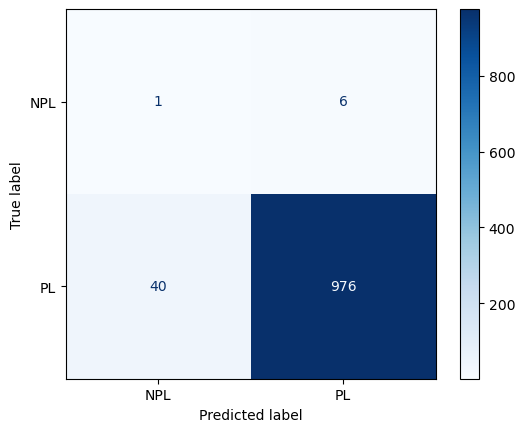

In [65]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(classifier, X_test, y_test, cmap='Blues', values_format='d')

c:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


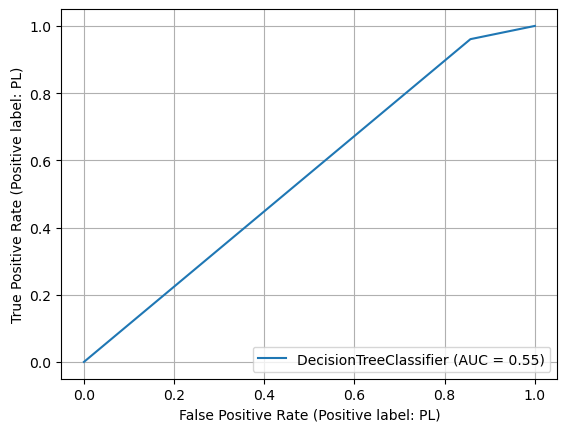

In [66]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier, X_test, y_test)
plt.grid()

### Prunning

In [67]:
# Create Decision Tree classifer object
# Train Decision Tree Classifer
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=8, random_state=101)
#Predict the response for test dataset
classifier = classifier.fit(smote_X_train, smote_y_train)
# Model Accuracy, how often is the classifier correct?
y_pred = classifier.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)

score = cross_val_score(model, X, y, cv=10)
print(score)
print("Cross Validation mean is ", np.mean(score)*100)
print("Cross Validation std is ", np.std(score)*100)

Accuracy: 75.75757575757575
[0.96187683 0.96187683 0.96187683 0.96187683 0.96480938 0.96480938
 0.95307918 0.96187683 0.96480938 0.96187683]
Cross Validation mean is  96.18768328445746
Cross Validation std is  0.32124490176256043


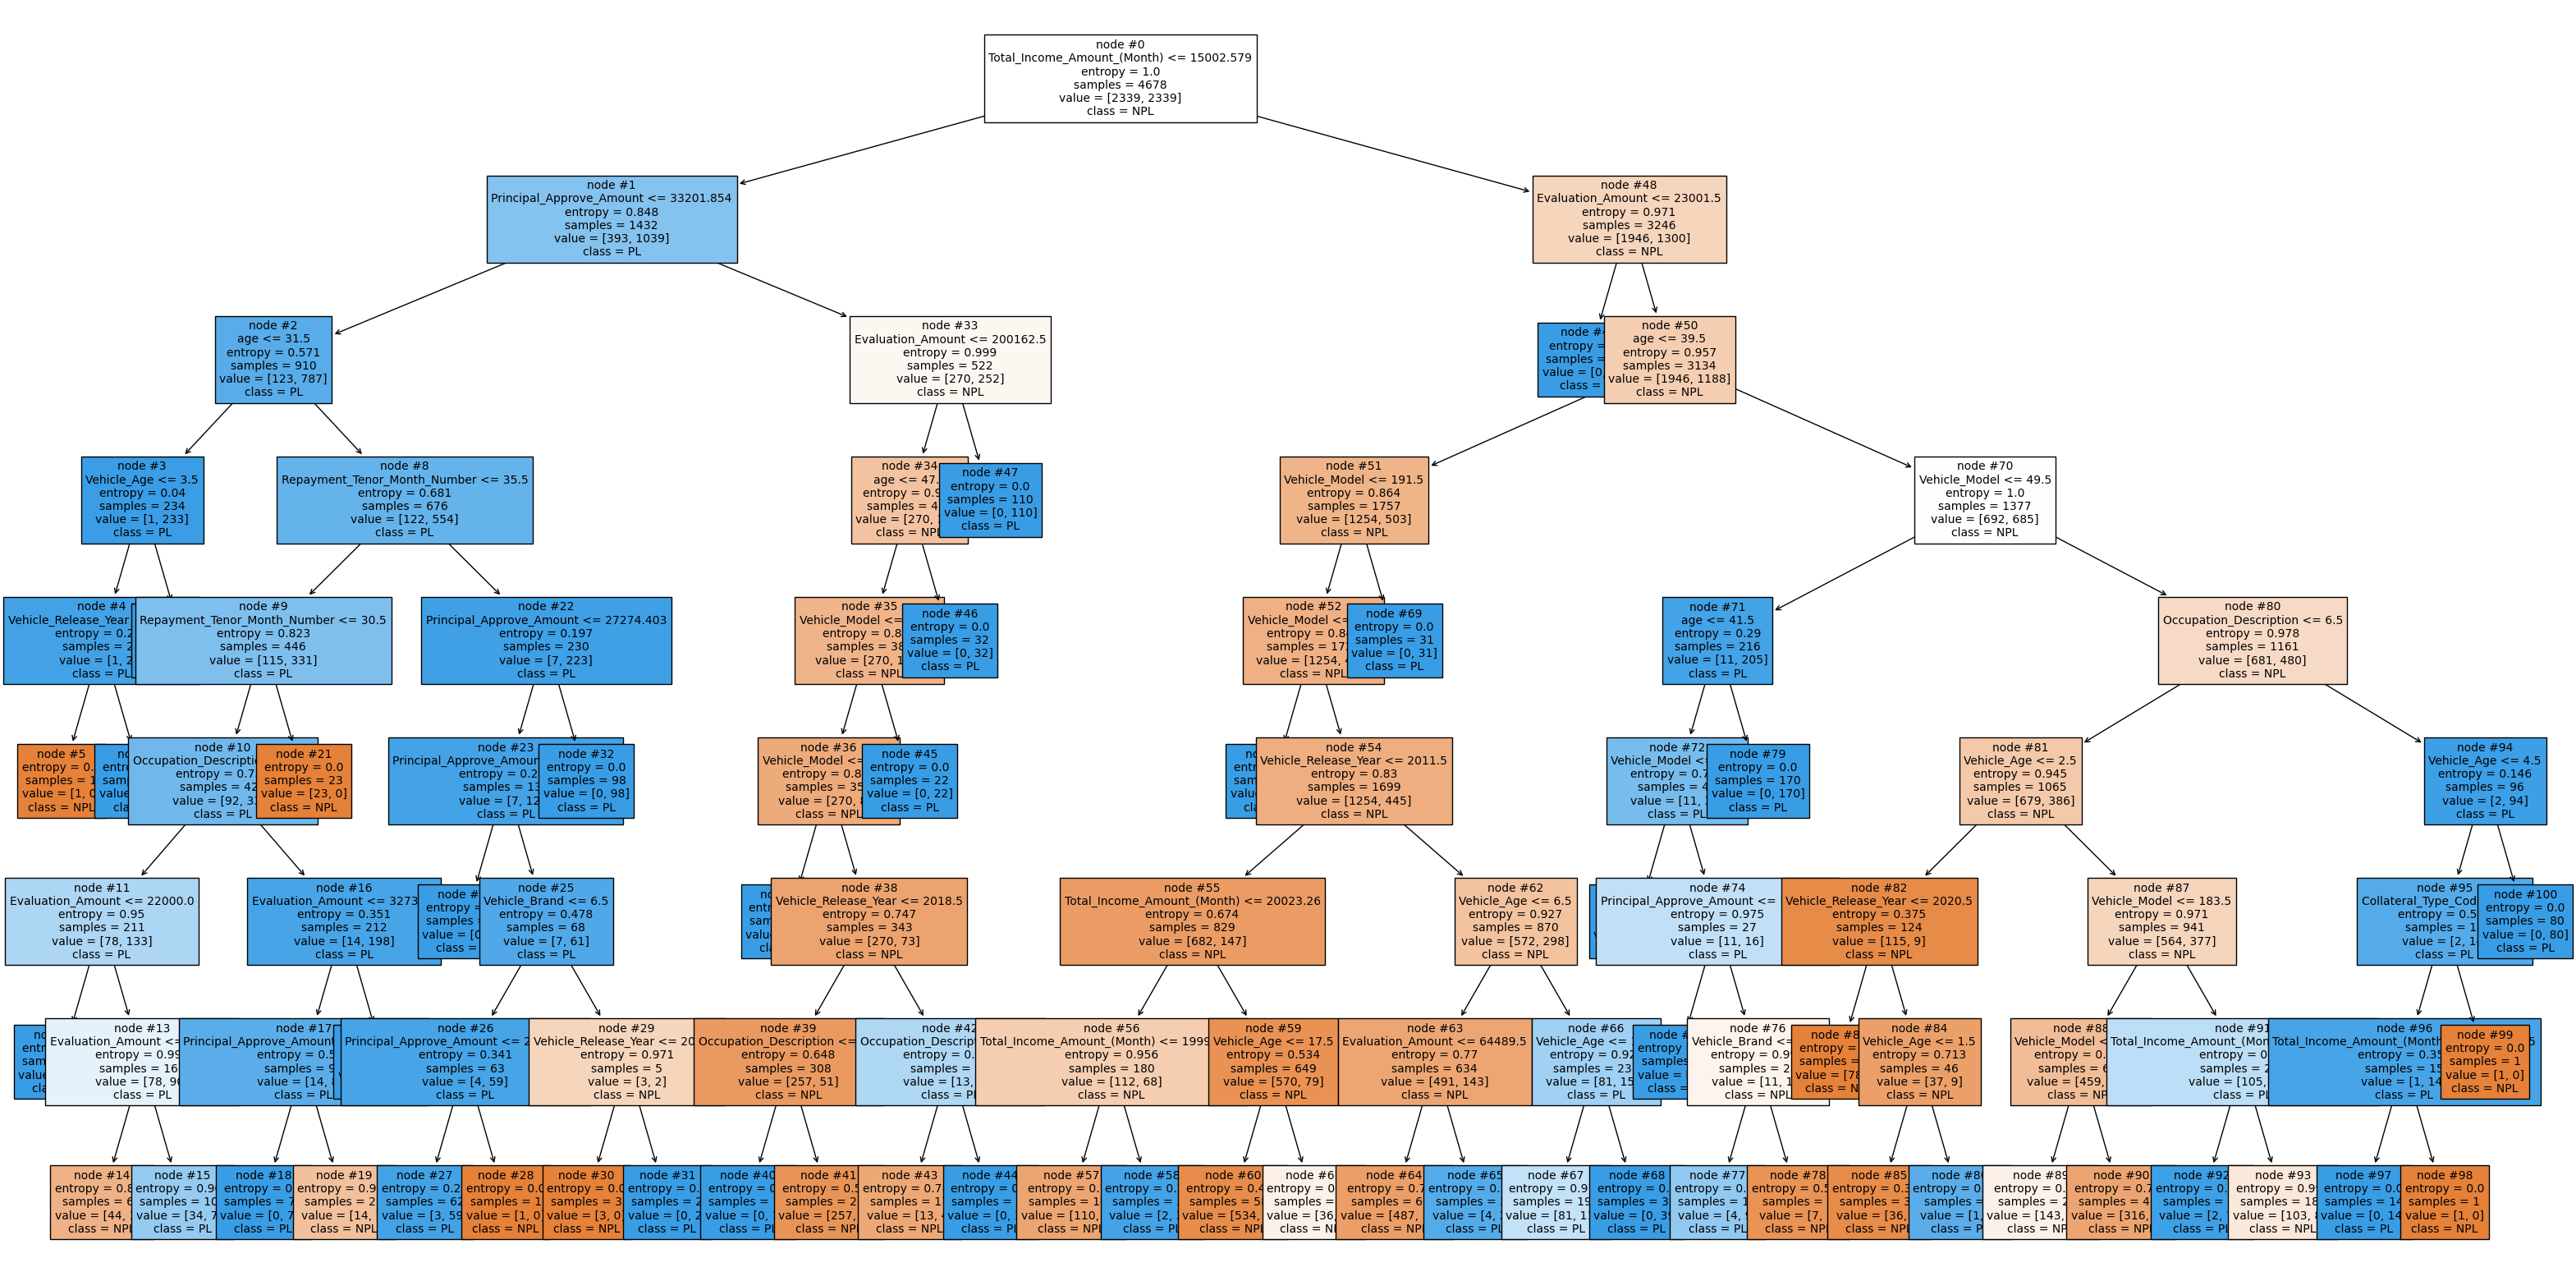

In [68]:
from sklearn import tree
fig = plt.figure(figsize=(40,20))
_ = tree.plot_tree(classifier, 
                   feature_names=['Principal_Approve_Amount', 'Repayment_Tenor_Month_Number', 'Gender', 'Occupation_Description',
       'Total_Income_Amount_(Month)', 'Collateral_Type_Code', 'Vehicle_Brand','Vehicle_Model','Vehicle_Release_Year',
       'Evaluation_Amount','age','Vehicle_Age'],
                   class_names=['NPL','PL'],
                   filled=True,node_ids=True, fontsize=10)

In [69]:
import graphviz

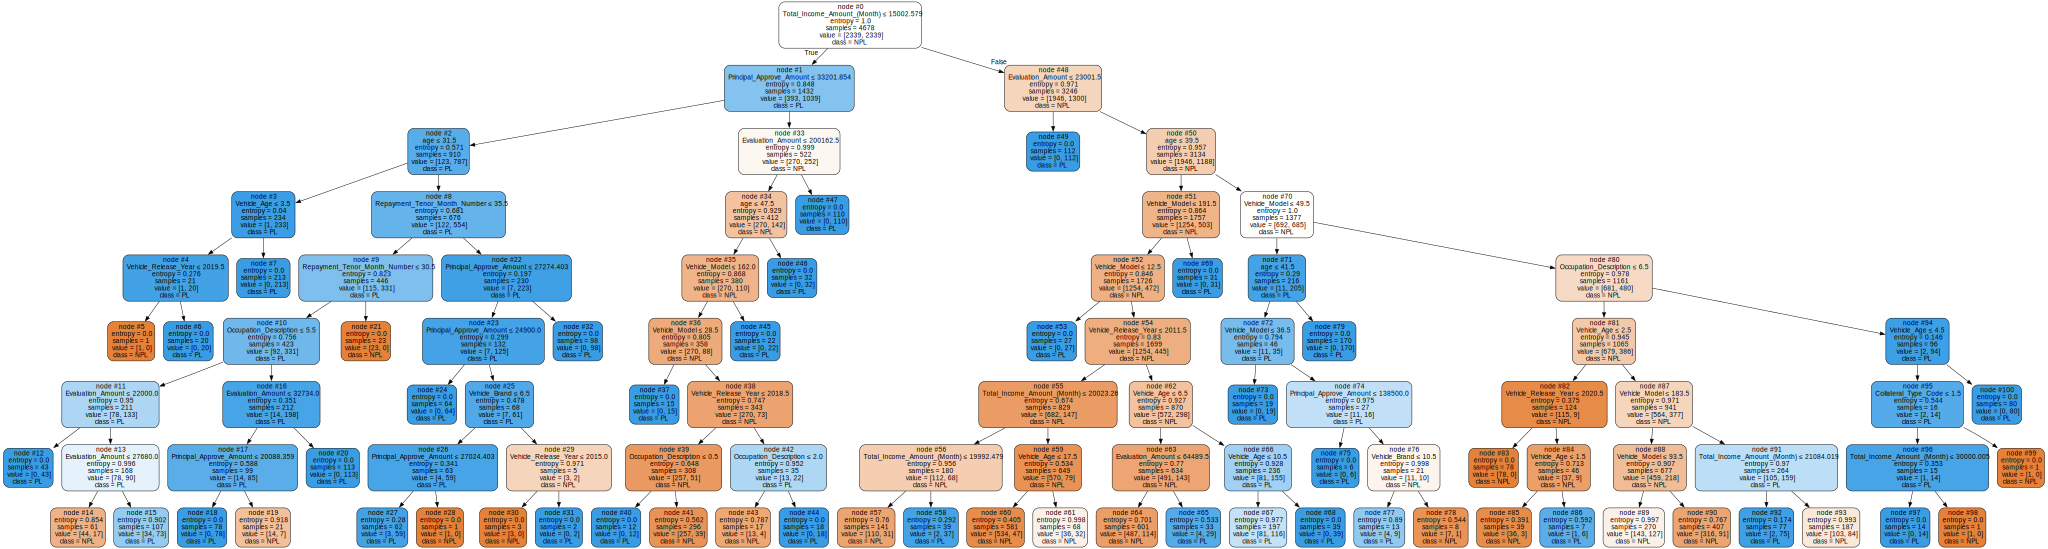

In [70]:
dot_data = tree.export_graphviz(classifier, out_file=None,
                                feature_names=['Principal_Approve_Amount', 'Repayment_Tenor_Month_Number', 'Gender', 'Occupation_Description',
       'Total_Income_Amount_(Month)', 'Collateral_Type_Code', 'Vehicle_Brand','Vehicle_Model','Vehicle_Release_Year',
       'Evaluation_Amount','age','Vehicle_Age'],  
                                class_names=['NPL','PL'],
                                filled=True,node_ids=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

### Confusion Metric and Classification report

In [79]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_pred, y_test)
print('Classification report  \n',cr)

Confusion matrix : 
 [[  4   3]
 [245 771]]
Classification report  
               precision    recall  f1-score   support

         NPL       0.57      0.02      0.03       249
          PL       0.76      1.00      0.86       774

    accuracy                           0.76      1023
   macro avg       0.67      0.51      0.45      1023
weighted avg       0.71      0.76      0.66      1023



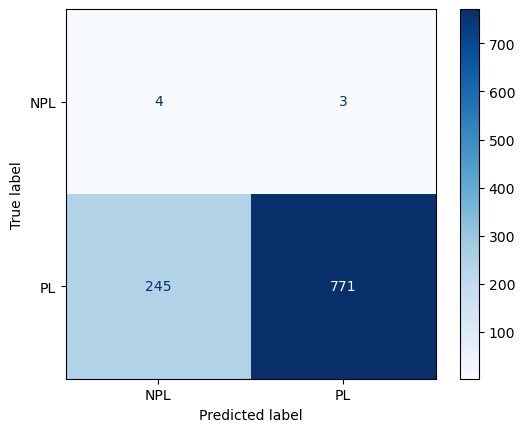

In [75]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(classifier, X_test, y_test, cmap='Blues', values_format='d')

c:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


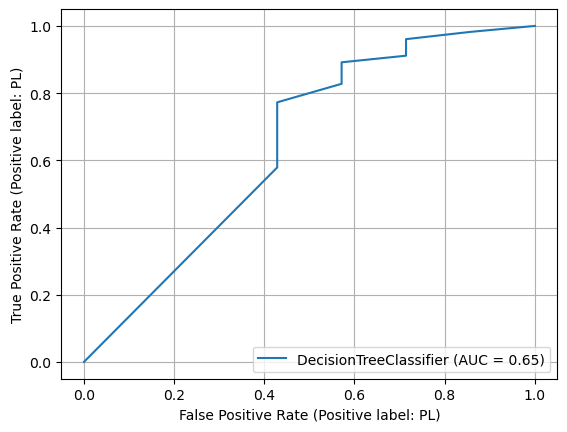

In [73]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier, X_test, y_test)
plt.grid()

#### Trial and Error ทำ Hyperparemeter Tuning ด้วยการเขียนเอง

In [167]:
# กำหนดค่าพารามิเตอร์ที่ต้องการทดสอบ
max_depths = [3, 4, 5, 6,7,8,9,10,11,12,13,14,15]
min_samples_splits = [2, 3, 4, 5]
min_samples_leaves = [1, 2, 3, 4]

best_accuracy = 0
best_parameters = {}

# ทดสอบโมเดล Decision tree ด้วยค่าพารามิเตอร์ที่ต้องการ
for max_depth in max_depths:
    for min_samples_split in min_samples_splits:
        for min_samples_leaf in min_samples_leaves:
            clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
            clf.fit(smote_X_train,smote_y_train)
            y_pred = clf.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            print("max_depth: {}, min_samples_split: {}, min_samples_leaf: {}, accuracy: {}".format(max_depth, min_samples_split, min_samples_leaf, accuracy))
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_parameters['max_depth'] = max_depth
                best_parameters['min_samples_split'] = min_samples_split
                best_parameters['min_samples_leaf'] = min_samples_leaf

# พิมพ์ค่าพารามิเตอร์ที่ดีที่สุด
print("Best parameters:", best_parameters)

max_depth: 3, min_samples_split: 2, min_samples_leaf: 1, accuracy: 0.4222873900293255
max_depth: 3, min_samples_split: 2, min_samples_leaf: 2, accuracy: 0.4222873900293255
max_depth: 3, min_samples_split: 2, min_samples_leaf: 3, accuracy: 0.4222873900293255
max_depth: 3, min_samples_split: 2, min_samples_leaf: 4, accuracy: 0.4222873900293255
max_depth: 3, min_samples_split: 3, min_samples_leaf: 1, accuracy: 0.4222873900293255
max_depth: 3, min_samples_split: 3, min_samples_leaf: 2, accuracy: 0.4222873900293255
max_depth: 3, min_samples_split: 3, min_samples_leaf: 3, accuracy: 0.4222873900293255
max_depth: 3, min_samples_split: 3, min_samples_leaf: 4, accuracy: 0.4222873900293255
max_depth: 3, min_samples_split: 4, min_samples_leaf: 1, accuracy: 0.4222873900293255
max_depth: 3, min_samples_split: 4, min_samples_leaf: 2, accuracy: 0.4222873900293255
max_depth: 3, min_samples_split: 4, min_samples_leaf: 3, accuracy: 0.4222873900293255
max_depth: 3, min_samples_split: 4, min_samples_leaf: 

In [168]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


model=DecisionTreeClassifier(max_depth = 15, min_samples_split = 2, min_samples_leaf = 3, random_state=101)

model.fit(smote_X_train,smote_y_train)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=3, random_state=101)

In [169]:
model.feature_importances_

array([0.12545077, 0.05506835, 0.00294071, 0.0723198 , 0.1532722 ,
       0.0077728 , 0.05600931, 0.17683592, 0.03450197, 0.15700546,
       0.09105105, 0.06777165])

In [170]:
fs = pd.Series(model.feature_importances_, index=smote_X_train.columns).sort_values(
    ascending=False
)
fs

Vehicle_Model                   0.176836
Evaluation_Amount               0.157005
Total_Income_Amount_(Month)     0.153272
Principal_Approve_Amount        0.125451
age                             0.091051
Occupation_Description          0.072320
Vehicle_Age                     0.067772
Vehicle_Brand                   0.056009
Repayment_Tenor_Month_Number    0.055068
Vehicle_Release_Year            0.034502
Collateral_Type_Code            0.007773
Gender                          0.002941
dtype: float64

In [171]:
fs.sum()

0.9999999999999999

<AxesSubplot:>

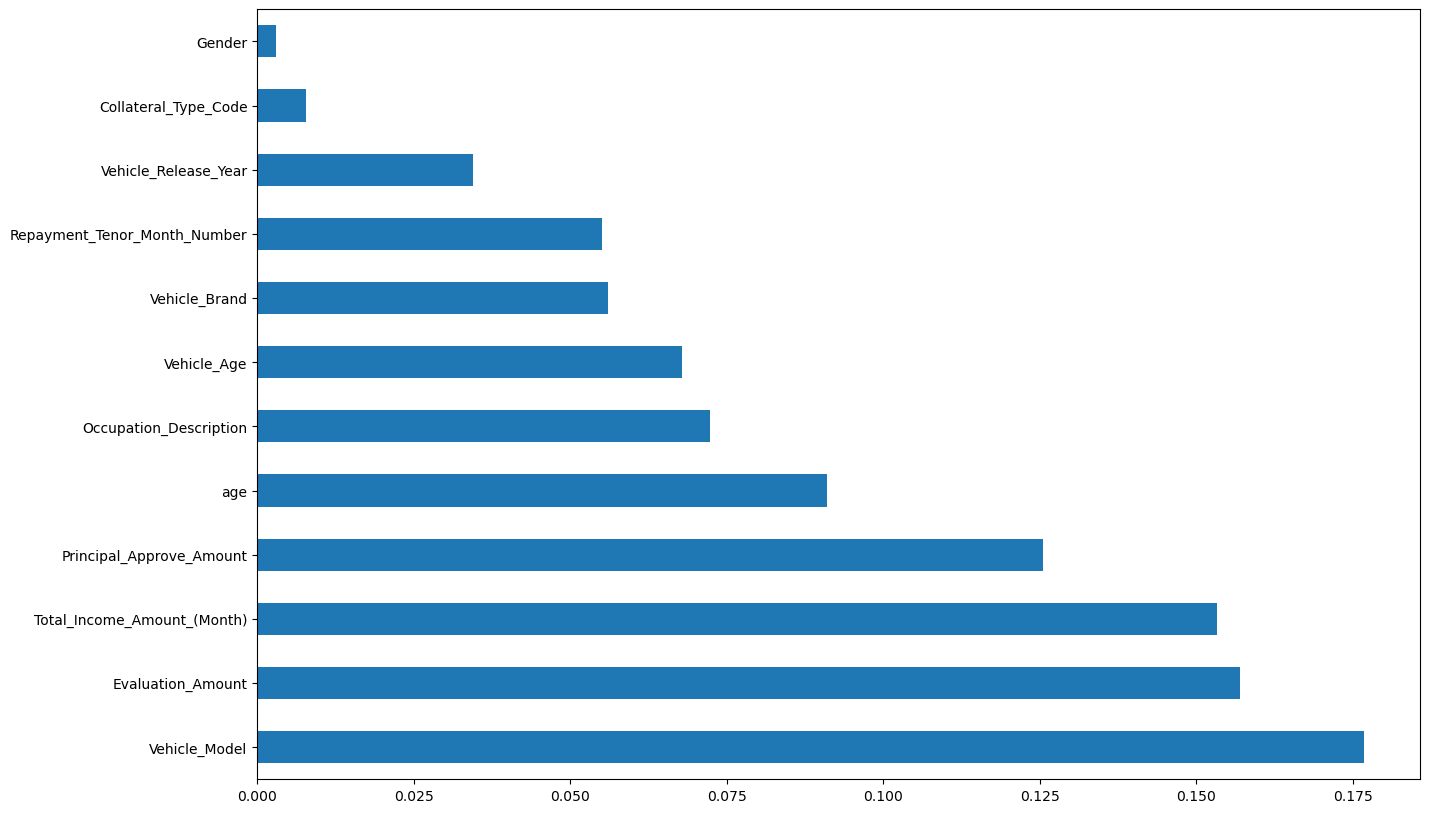

In [172]:
plt.figure(figsize=(15,10))
fs.plot(kind='barh')

In [173]:
# Create Decision Tree classifer object
# Train Decision Tree Classifer
classifier = DecisionTreeClassifier(max_depth = 15, min_samples_split = 3, min_samples_leaf = 4, random_state=101)
#Predict the response for test dataset
classifier = classifier.fit(smote_X_train,smote_y_train)
# Model Accuracy, how often is the classifier correct?
y_pred = classifier.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)

score = cross_val_score(model, X, y, cv=10)
print(score)
print("Cross Validation mean is ", np.mean(score)*100)
print("Cross Validation stdis ", np.std(score)*100)

Accuracy: 93.0596285434995
[0.97653959 0.97947214 0.97653959 0.95601173 0.95601173 0.97947214
 0.96187683 0.97067449 0.96187683 0.97067449]
Cross Validation mean is  96.89149560117303
Cross Validation stdis  0.8817182626611668


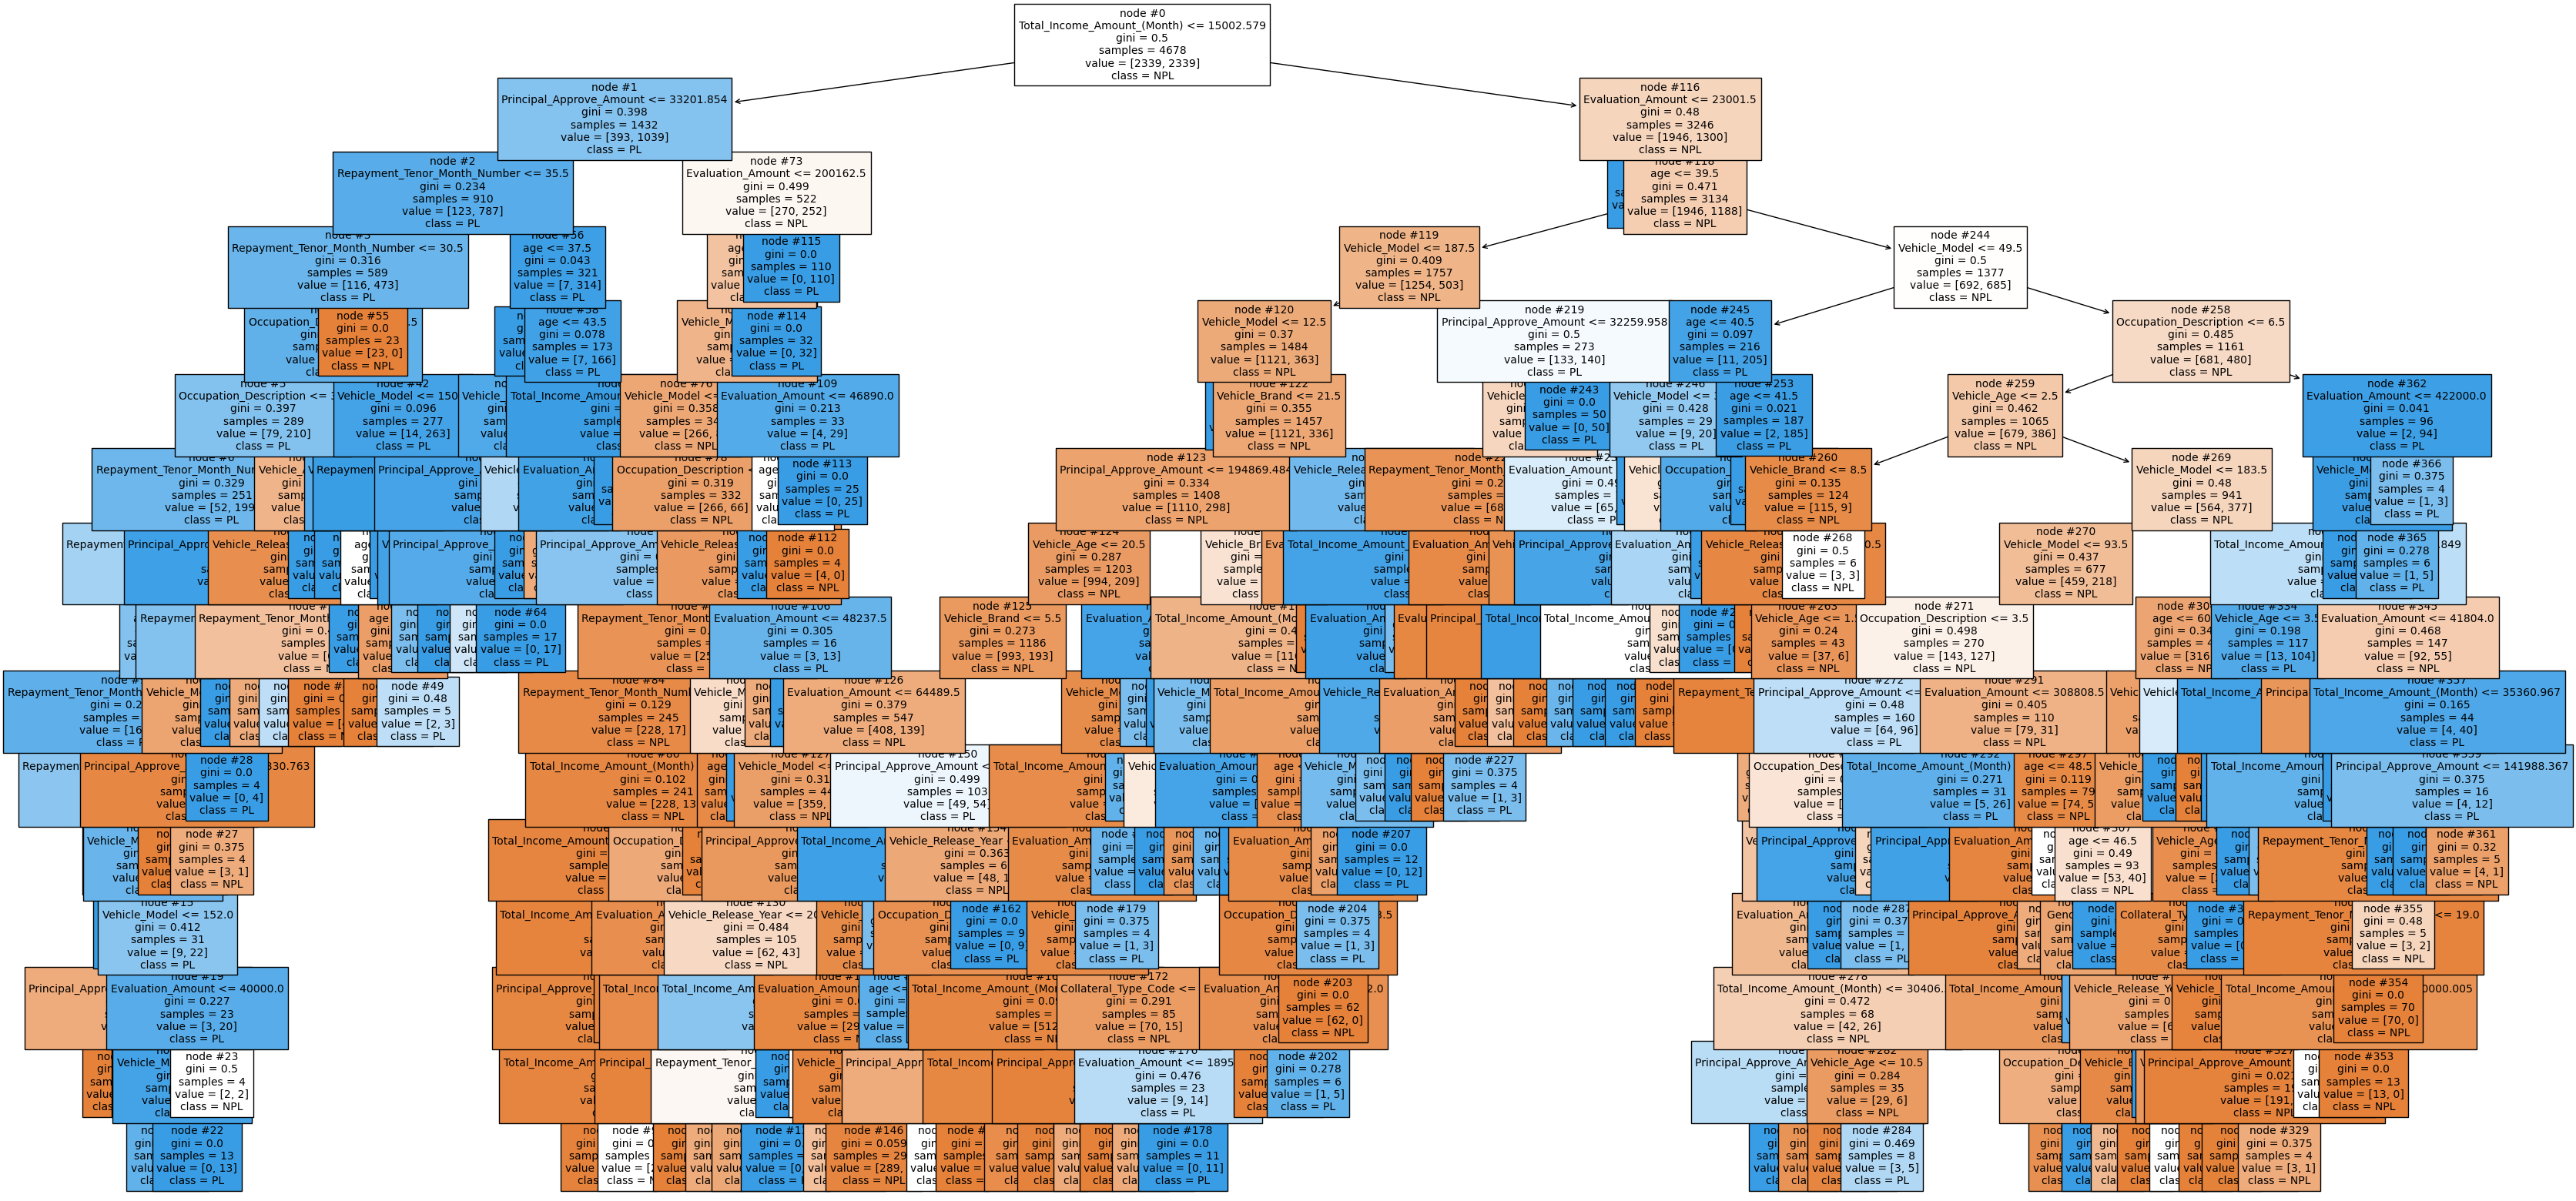

In [174]:
from sklearn import tree
fig = plt.figure(figsize=(40,20))
_ = tree.plot_tree(classifier, 
                   feature_names=['Principal_Approve_Amount', 'Repayment_Tenor_Month_Number', 'Gender', 'Occupation_Description',
       'Total_Income_Amount_(Month)', 'Collateral_Type_Code', 'Vehicle_Brand','Vehicle_Model','Vehicle_Release_Year',
       'Evaluation_Amount','age','Vehicle_Age'],
                   class_names=['NPL','PL'],
                   filled=True,node_ids=True, fontsize=10)

In [175]:
import graphviz

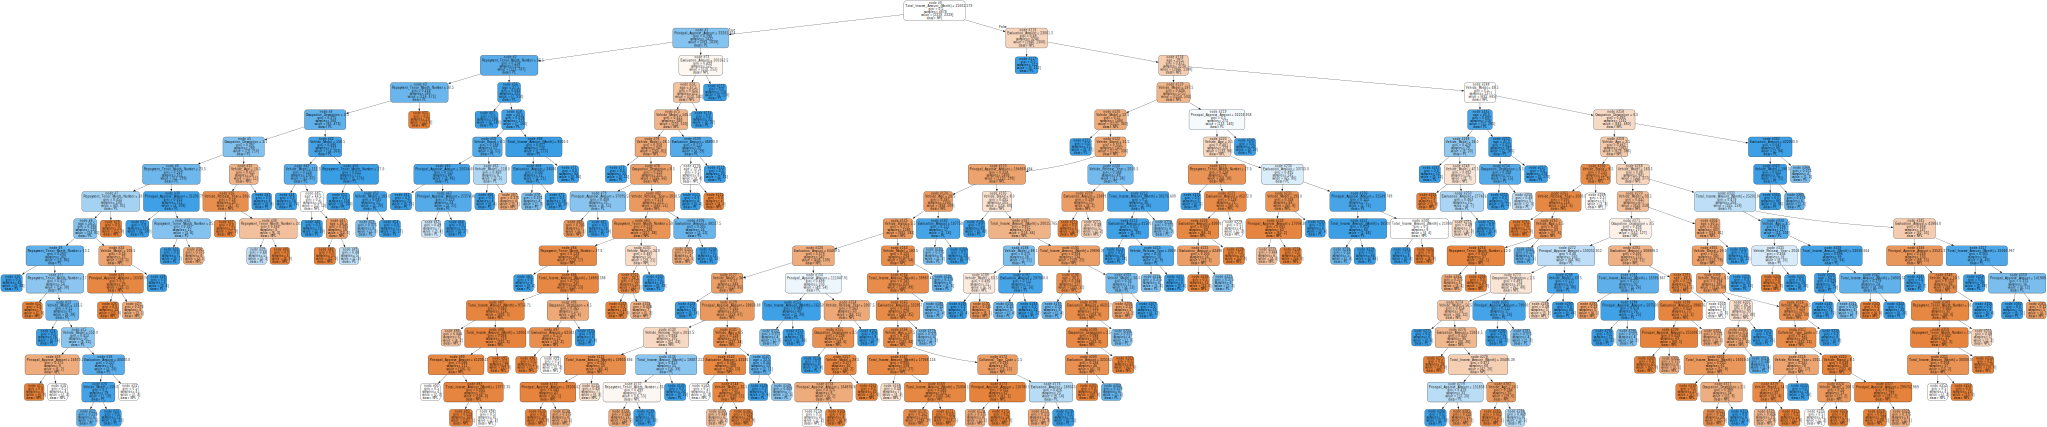

In [176]:
dot_data = tree.export_graphviz(classifier, out_file=None,
                                feature_names=['Principal_Approve_Amount', 'Repayment_Tenor_Month_Number', 'Gender', 'Occupation_Description',
       'Total_Income_Amount_(Month)', 'Collateral_Type_Code', 'Vehicle_Brand','Vehicle_Model','Vehicle_Release_Year',
       'Evaluation_Amount','age','Vehicle_Age'],
                                class_names=['NPL','PL'],
                                filled=True,node_ids=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [177]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_pred, y_test)
print('Classification report  \n',cr)

Confusion matrix : 
 [[  2   5]
 [ 66 950]]
Classification report  
               precision    recall  f1-score   support

         NPL       0.29      0.03      0.05        68
          PL       0.94      0.99      0.96       955

    accuracy                           0.93      1023
   macro avg       0.61      0.51      0.51      1023
weighted avg       0.89      0.93      0.90      1023



c:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


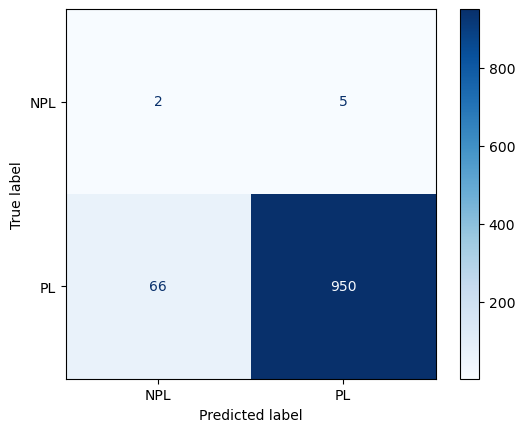

In [178]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(classifier, X_test, y_test, cmap='Blues', values_format='d')

c:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


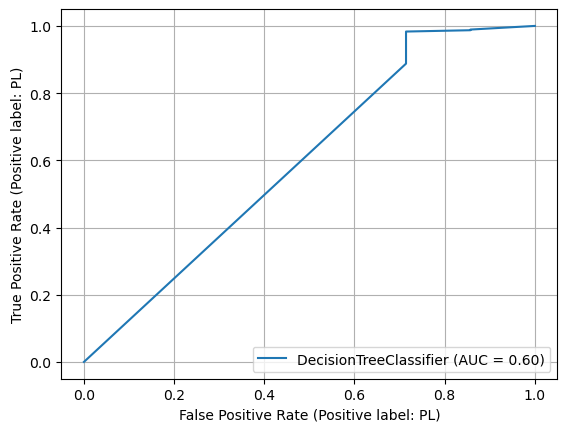

In [179]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier, X_test, y_test)
plt.grid()

### Random Forest

In [180]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=250, random_state=101)
classifier = model.fit(smote_X_train,smote_y_train)
classifier

RandomForestClassifier(n_estimators=250, random_state=101)

In [181]:
#prediction
y_pred = classifier.predict(X_test)
from sklearn import metrics
#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred)*100)

score = cross_val_score(model, X, y, cv=10)
print(score)
print("Cross Validation mean is ", np.mean(score)*100)
print("Cross Validation std is ", np.std(score)*100)

Accuracy Score: 98.72922776148583
[0.98533724 0.98533724 0.98533724 0.98533724 0.98533724 0.98240469
 0.98240469 0.98240469 0.98240469 0.98240469]
Cross Validation mean is  98.38709677419354
Cross Validation std is  0.14662756598240456


In [182]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_pred, y_test)
print('Classification report  \n',cr)

Confusion matrix : 
 [[   0    7]
 [   6 1010]]
Classification report  
               precision    recall  f1-score   support

         NPL       0.00      0.00      0.00         6
          PL       0.99      0.99      0.99      1017

    accuracy                           0.99      1023
   macro avg       0.50      0.50      0.50      1023
weighted avg       0.99      0.99      0.99      1023



c:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


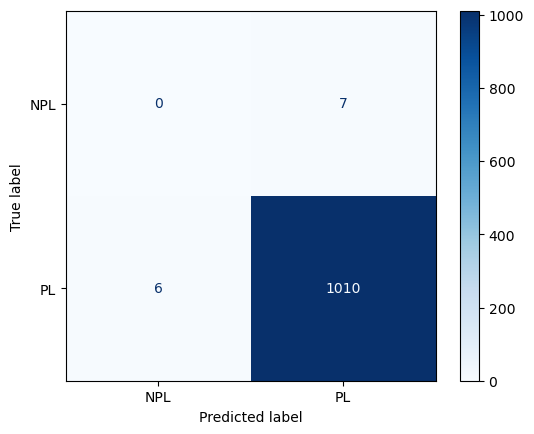

In [183]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(classifier, X_test, y_test, cmap='Blues', values_format='d')

c:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


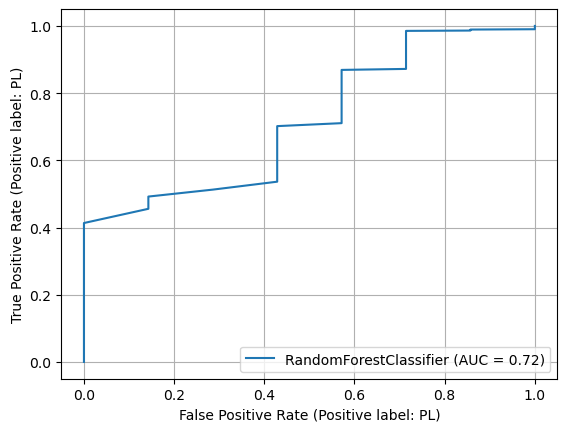

In [184]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier, X_test, y_test)
plt.grid()

# Under Sampling

In [185]:
from imblearn import under_sampling, over_sampling
from collections import Counter

In [186]:
cols = df[['Principal_Approve_Amount', 'Repayment_Tenor_Month_Number', 'Gender', 'Occupation_Description',
       'Total_Income_Amount_(Month)', 'Collateral_Type_Code', 'Vehicle_Brand','Vehicle_Model','Vehicle_Release_Year',
       'Evaluation_Amount','age','Vehicle_Age']]

X = cols
# test approve กับ ที่ปล่อย
# X2 = df[['Principal Approve Amount', 'Principal Amount',
#        'Repayment Tenor Month Number', 'Gender', 'Occupation Description',
#        'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand',
#        'Vehicle Release Year', 'age', 'Vehicle Age']]
y = df['DPD']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

<AxesSubplot:>

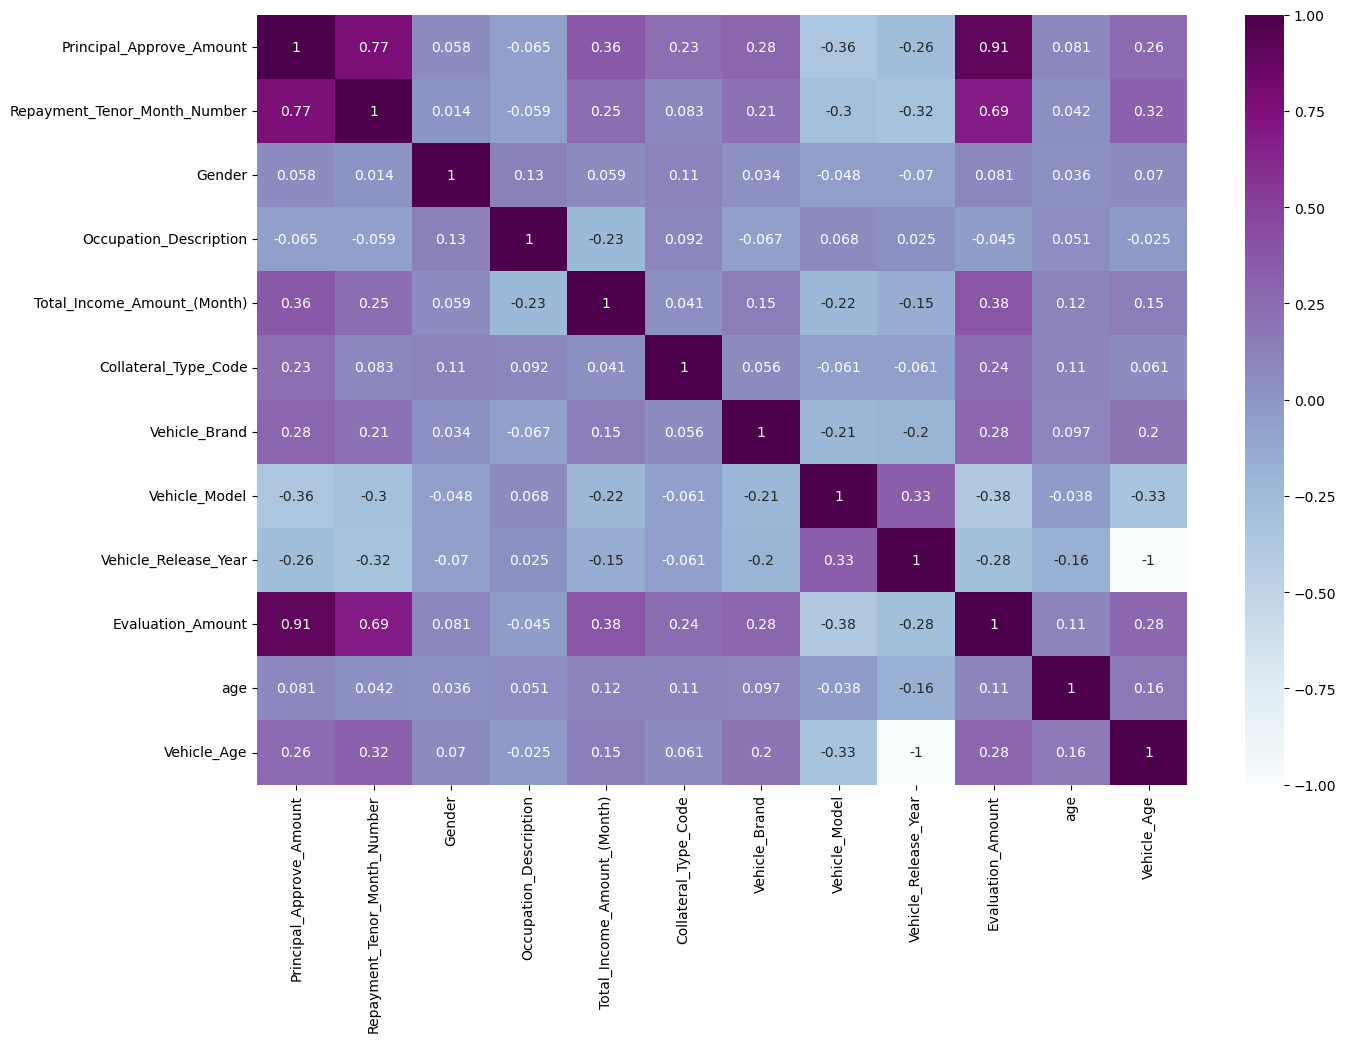

In [187]:
corr = cols.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True, cmap="BuPu")

In [188]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=101)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

print(sorted(Counter(y_resampled).items()),y_resampled.shape)

[('NPL', 48), ('PL', 48)] (96,)


In [189]:
print('Before sampling class distribution : ', Counter(y_train))
print('After sampling class distribution : ', Counter(y_resampled))

Before sampling class distribution :  Counter({'PL': 2339, 'NPL': 48})
After sampling class distribution :  Counter({'NPL': 48, 'PL': 48})


In [190]:
X_resampled.shape

(96, 12)

In [191]:
y_resampled.shape

(96,)

In [192]:
X_test.shape

(1023, 12)

In [193]:
y_test.shape

(1023,)

In [194]:
y_resampled.value_counts()

NPL    48
PL     48
Name: DPD, dtype: int64

In [195]:
y_test.value_counts()

PL     1016
NPL       7
Name: DPD, dtype: int64

<AxesSubplot:title={'center':'Train target'}>

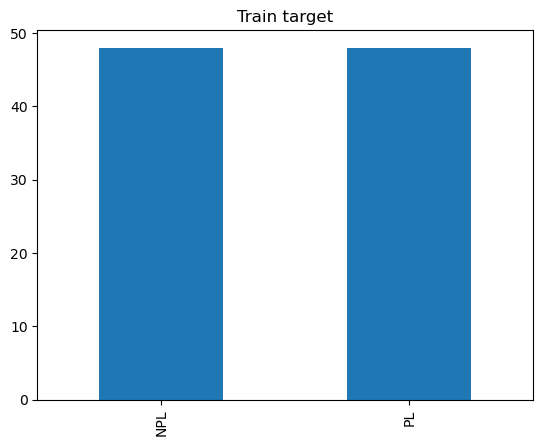

In [196]:
plt.title('Train target')
y_resampled.value_counts().plot(kind='bar')

<AxesSubplot:title={'center':'Test target'}>

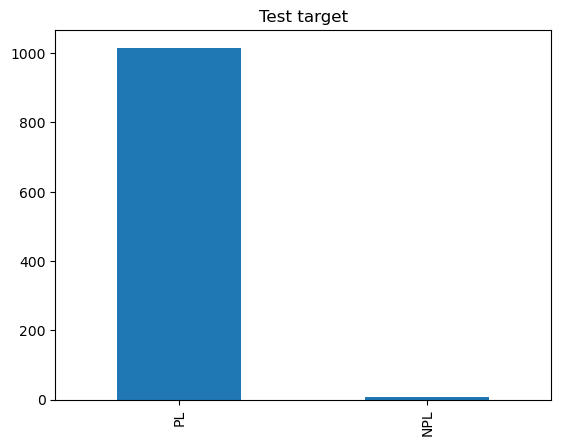

In [197]:
plt.title('Test target')
y_test.value_counts().plot(kind='bar')

## Feature Importance

In [198]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


model=DecisionTreeClassifier(criterion='entropy', random_state=101)

model.fit(X_resampled, y_resampled)

DecisionTreeClassifier(criterion='entropy', random_state=101)

In [199]:
X = cols
y = df['DPD']

In [200]:
model.feature_importances_

array([0.0622789 , 0.05739349, 0.04294743, 0.03682923, 0.11730126,
       0.02452994, 0.026478  , 0.07421862, 0.05137011, 0.29126181,
       0.15402629, 0.06136492])

In [201]:
fs = pd.Series(model.feature_importances_, index=X_resampled.columns).sort_values(
    ascending=False
)
fs

Evaluation_Amount               0.291262
age                             0.154026
Total_Income_Amount_(Month)     0.117301
Vehicle_Model                   0.074219
Principal_Approve_Amount        0.062279
Vehicle_Age                     0.061365
Repayment_Tenor_Month_Number    0.057393
Vehicle_Release_Year            0.051370
Gender                          0.042947
Occupation_Description          0.036829
Vehicle_Brand                   0.026478
Collateral_Type_Code            0.024530
dtype: float64

In [202]:
fs.sum()

1.0000000000000002

<AxesSubplot:>

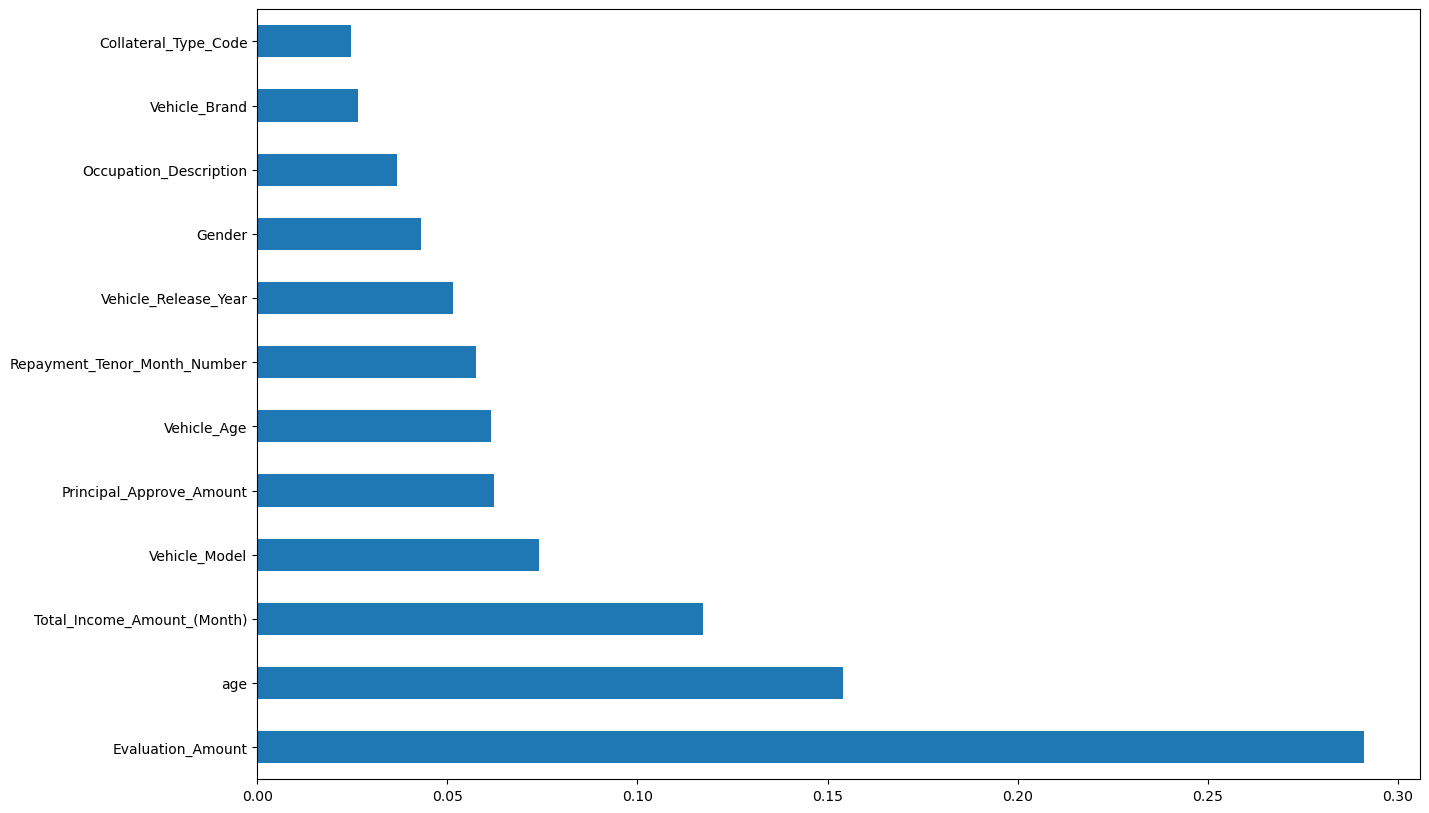

In [203]:
plt.figure(figsize=(15,10))
fs.plot(kind='barh')

## Cross Validation

In [204]:
from sklearn.model_selection import cross_val_score
def classify(model, x,y):
    X_resampled, X_test, y_resampled, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    model.fit(X_resampled, y_resampled)
    print("Accuracy is : ", model.score(X_test, y_test)*100)
    #Cross Calidation
    #eg: cv-5, train-4, test-1
    score = cross_val_score(model, X, y, cv=10)
    print(score)
    print("Cross Validation is ", np.mean(score)*100)
    print("Cross Validation is ", np.std(score)*100)
    return model

In [205]:
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression(random_state=101)
# cv_lr = classify(model,X,y)

In [206]:
# from sklearn.tree import DecisionTreeClassifier
# model = DecisionTreeClassifier(criterion='entropy', random_state=101)
# cv_dt = classify(model,X,y)

### Decision Tree

In [207]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', random_state=101)
classifier = model.fit(X_resampled,y_resampled)
classifier

DecisionTreeClassifier(criterion='entropy', random_state=101)

In [208]:
# #prediction
y_pred = classifier.predict(X_test)

from sklearn import metrics
#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred)*100)

score = cross_val_score(model, X, y, cv=10)
print(score)
print("Cross Validation mean is ", np.mean(score)*100)
print("Cross Validation std is ", np.std(score)*100)

Accuracy Score: 61.48582600195503
[0.96187683 0.96187683 0.96187683 0.96187683 0.96480938 0.96480938
 0.95307918 0.96187683 0.96480938 0.96187683]
Cross Validation mean is  96.18768328445746
Cross Validation std is  0.32124490176256043


In [209]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_pred, y_test)
print('Classification report  \n',cr)

Confusion matrix : 
 [[  5   2]
 [392 624]]
Classification report  
               precision    recall  f1-score   support

         NPL       0.71      0.01      0.02       397
          PL       0.61      1.00      0.76       626

    accuracy                           0.61      1023
   macro avg       0.66      0.50      0.39      1023
weighted avg       0.65      0.61      0.47      1023



c:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


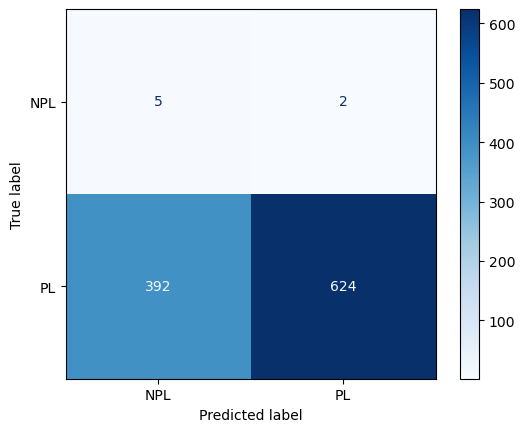

In [210]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(classifier, X_test, y_test, cmap='Blues', values_format='d')

c:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


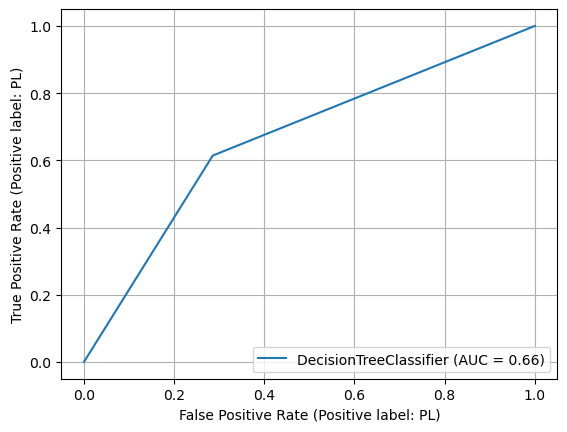

In [211]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier, X_test, y_test)
plt.grid()

### Prunning

In [212]:
# Create Decision Tree classifer object
# Train Decision Tree Classifer
classifier = DecisionTreeClassifier(criterion='entropy',max_depth = 6, random_state=101)
#Predict the response for test dataset
classifier = classifier.fit(X_resampled, y_resampled)
# Model Accuracy, how often is the classifier correct?
y_pred = classifier.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)

score = cross_val_score(model, X, y, cv=10)
print(score)
print("Cross Validation mean is ", np.mean(score)*100)
print("Cross Validation stdis ", np.std(score)*100)

Accuracy: 64.90713587487781
[0.96187683 0.96187683 0.96187683 0.96187683 0.96480938 0.96480938
 0.95307918 0.96187683 0.96480938 0.96187683]
Cross Validation mean is  96.18768328445746
Cross Validation stdis  0.32124490176256043


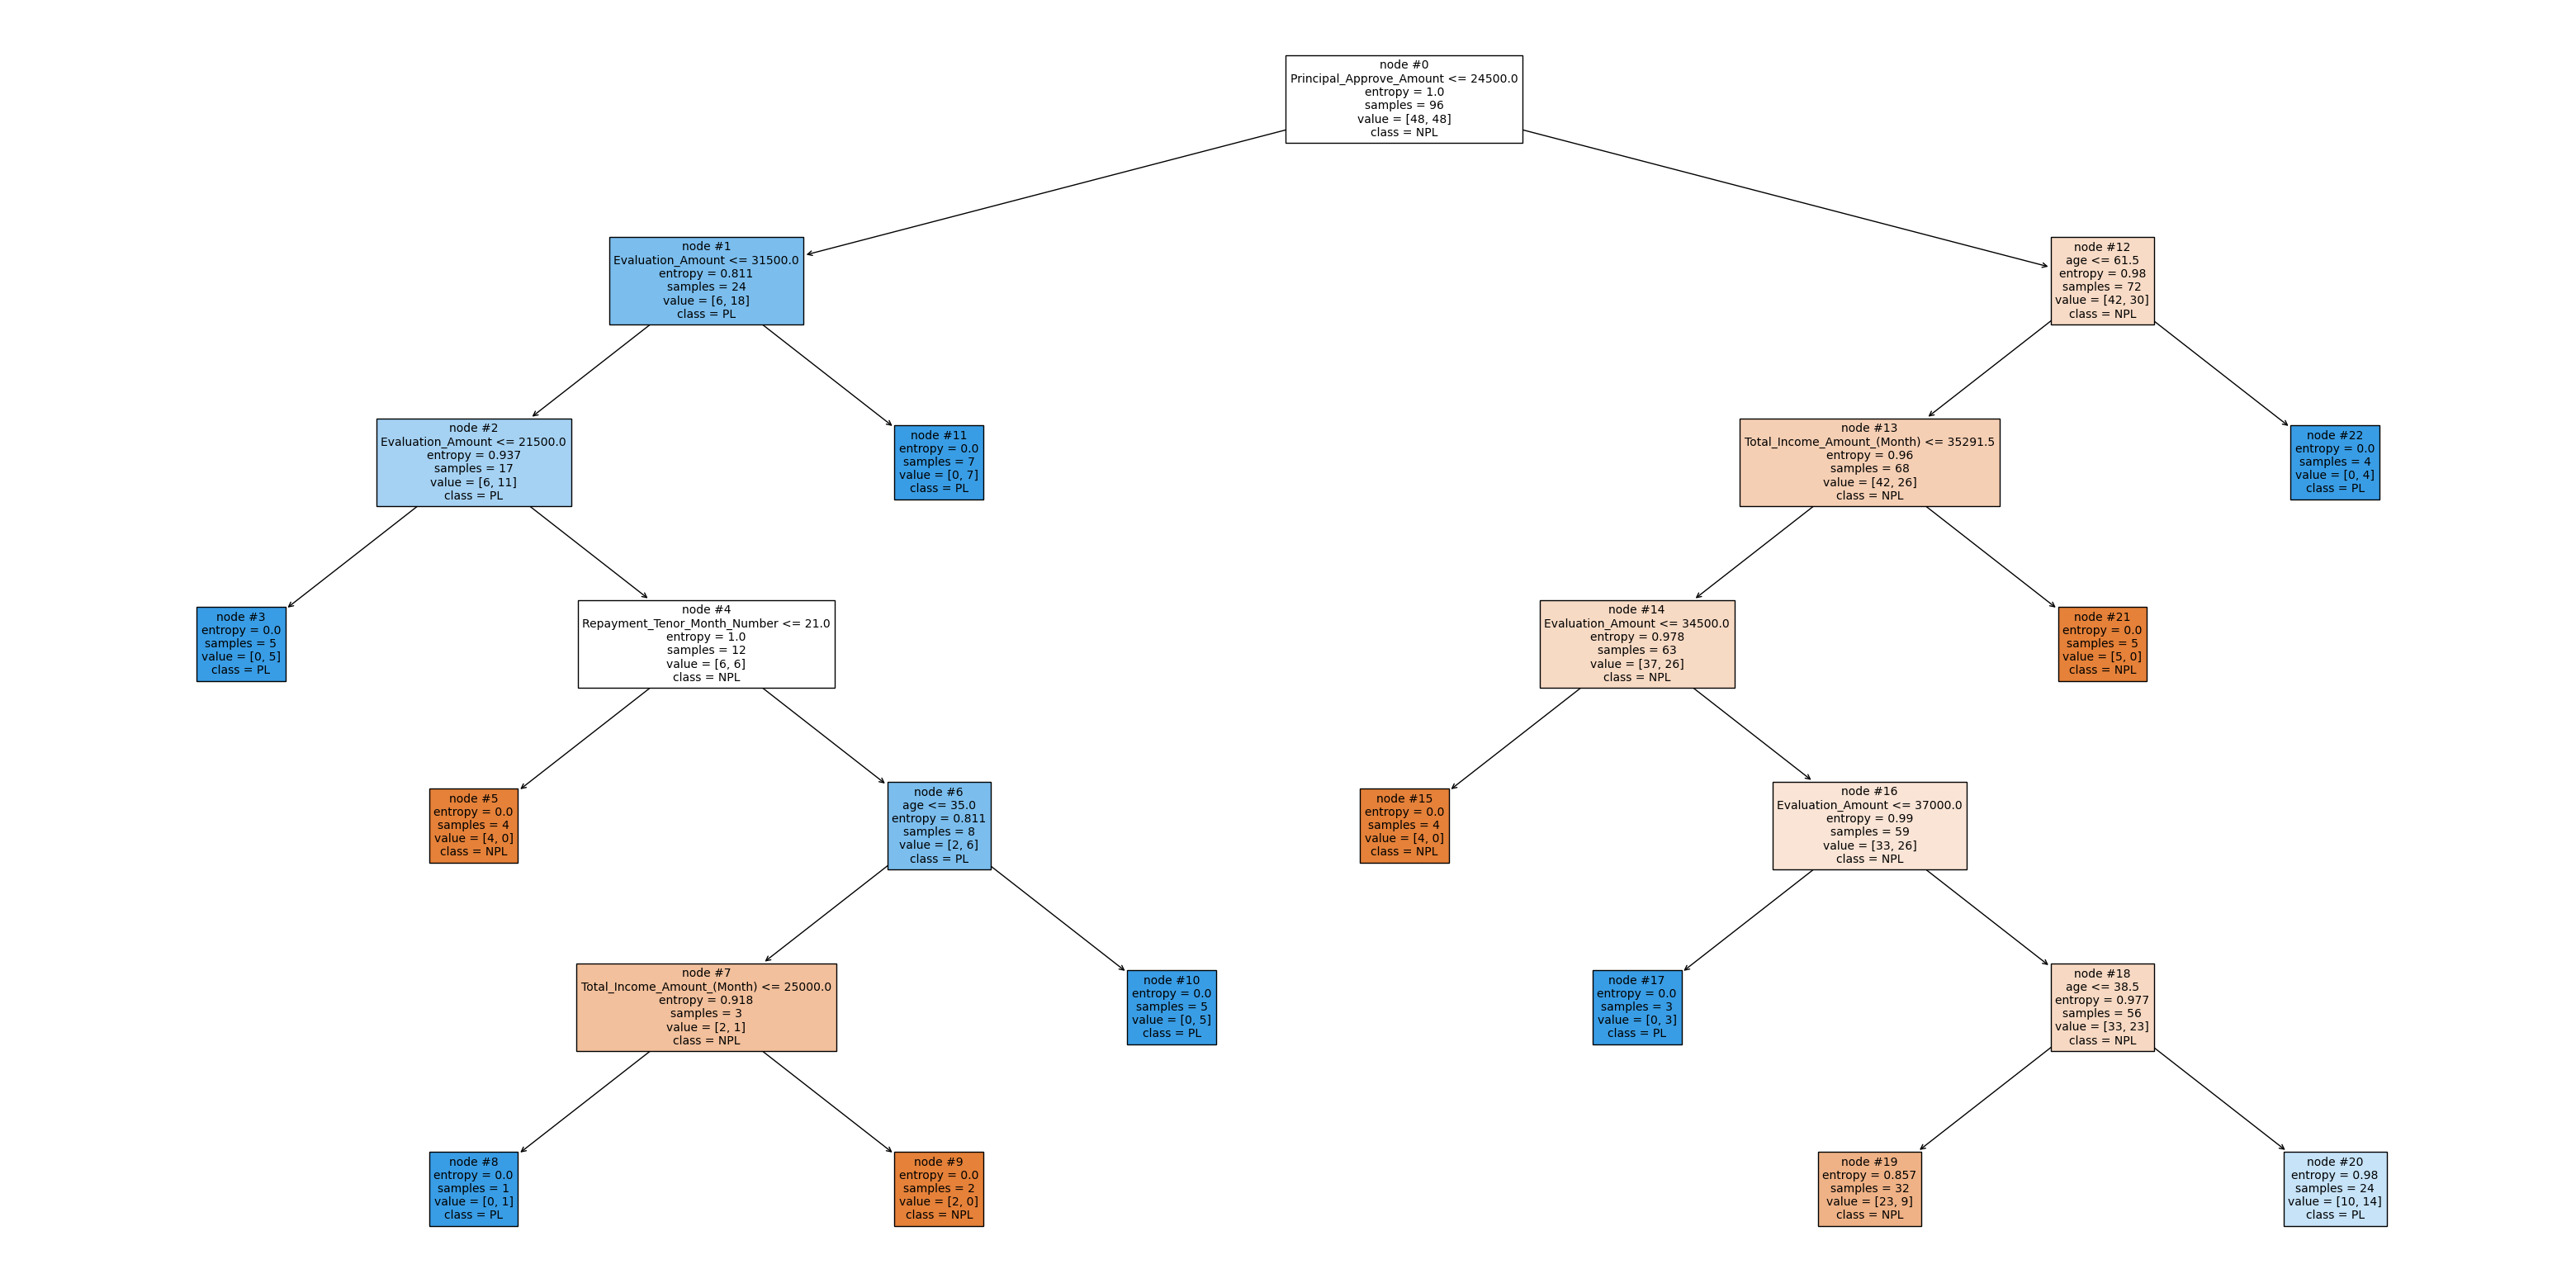

In [213]:
from sklearn import tree
fig = plt.figure(figsize=(40,20))
_ = tree.plot_tree(classifier, 
                   feature_names=['Principal_Approve_Amount', 'Repayment_Tenor_Month_Number', 'Gender', 'Occupation_Description',
       'Total_Income_Amount_(Month)', 'Collateral_Type_Code', 'Vehicle_Brand','Vehicle_Model','Vehicle_Release_Year',
       'Evaluation_Amount','age','Vehicle_Age'],
                   class_names=['NPL','PL'],
                   filled=True,node_ids=True, fontsize=10)

In [214]:
import graphviz

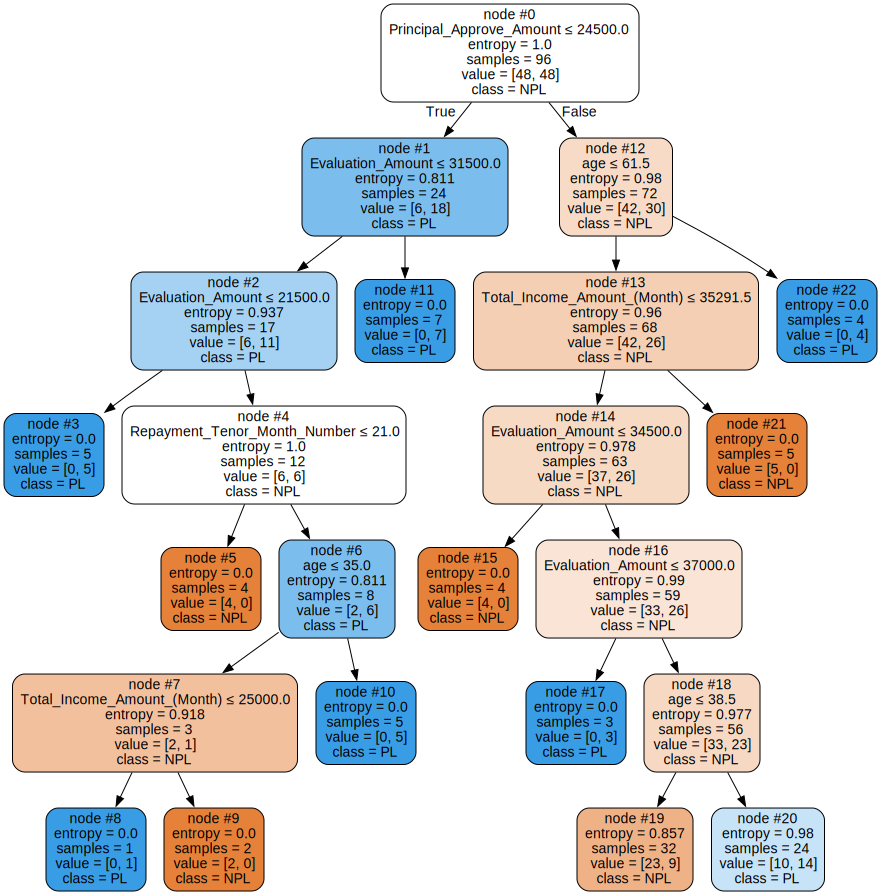

In [215]:
dot_data = tree.export_graphviz(classifier, out_file=None,
                                feature_names=['Principal_Approve_Amount', 'Repayment_Tenor_Month_Number', 'Gender', 'Occupation_Description',
       'Total_Income_Amount_(Month)', 'Collateral_Type_Code', 'Vehicle_Brand','Vehicle_Model','Vehicle_Release_Year',
       'Evaluation_Amount','age','Vehicle_Age'],
                                class_names=['NPL','PL'],
                                filled=True,node_ids=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

### Confusion Metric and Classification report

In [216]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_pred, y_test)
print('Classification report  \n',cr)

Confusion matrix : 
 [[  5   2]
 [357 659]]
Classification report  
               precision    recall  f1-score   support

         NPL       0.71      0.01      0.03       362
          PL       0.65      1.00      0.79       661

    accuracy                           0.65      1023
   macro avg       0.68      0.51      0.41      1023
weighted avg       0.67      0.65      0.52      1023



c:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


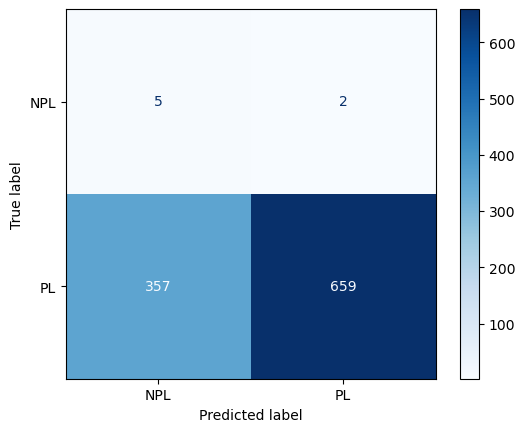

In [217]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(classifier, X_test, y_test, cmap='Blues', values_format='d')

c:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


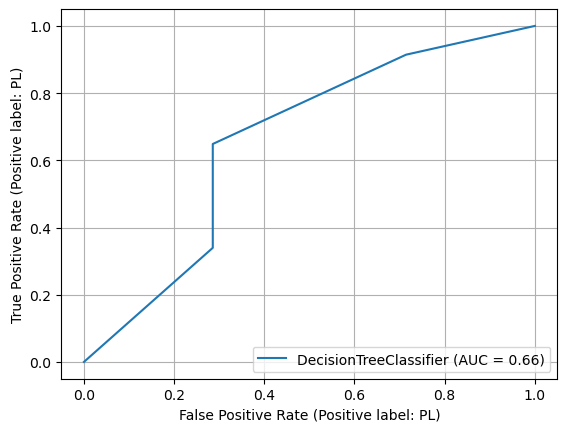

In [218]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier, X_test, y_test)
plt.grid()

#### Trial and Error ทำ Hyperparemeter Tuning ด้วยการเขียนเอง

In [219]:
# กำหนดค่าพารามิเตอร์ที่ต้องการทดสอบ
max_depths = [3, 4, 5, 6,7,8,9,10,11,12,13,14,15]
min_samples_splits = [2, 3, 4, 5]
min_samples_leaves = [1, 2, 3, 4]

best_accuracy = 0
best_parameters = {}

# ทดสอบโมเดล Decision tree ด้วยค่าพารามิเตอร์ที่ต้องการ
for max_depth in max_depths:
    for min_samples_split in min_samples_splits:
        for min_samples_leaf in min_samples_leaves:
            clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
            clf.fit(X_resampled,y_resampled)
            y_pred = clf.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            print("max_depth: {}, min_samples_split: {}, min_samples_leaf: {}, accuracy: {}".format(max_depth, min_samples_split, min_samples_leaf, accuracy))
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_parameters['max_depth'] = max_depth
                best_parameters['min_samples_split'] = min_samples_split
                best_parameters['min_samples_leaf'] = min_samples_leaf

# พิมพ์ค่าพารามิเตอร์ที่ดีที่สุด
print("Best parameters:", best_parameters)

max_depth: 3, min_samples_split: 2, min_samples_leaf: 1, accuracy: 0.37927663734115347
max_depth: 3, min_samples_split: 2, min_samples_leaf: 2, accuracy: 0.35581622678396874
max_depth: 3, min_samples_split: 2, min_samples_leaf: 3, accuracy: 0.4203323558162268
max_depth: 3, min_samples_split: 2, min_samples_leaf: 4, accuracy: 0.41348973607038125
max_depth: 3, min_samples_split: 3, min_samples_leaf: 1, accuracy: 0.41348973607038125
max_depth: 3, min_samples_split: 3, min_samples_leaf: 2, accuracy: 0.4066471163245357
max_depth: 3, min_samples_split: 3, min_samples_leaf: 3, accuracy: 0.37927663734115347
max_depth: 3, min_samples_split: 3, min_samples_leaf: 4, accuracy: 0.4203323558162268
max_depth: 3, min_samples_split: 4, min_samples_leaf: 1, accuracy: 0.35581622678396874
max_depth: 3, min_samples_split: 4, min_samples_leaf: 2, accuracy: 0.37927663734115347
max_depth: 3, min_samples_split: 4, min_samples_leaf: 3, accuracy: 0.386119257086999
max_depth: 3, min_samples_split: 4, min_samples_

In [220]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


model=DecisionTreeClassifier(criterion='entropy',max_depth = 15, min_samples_split = 5, min_samples_leaf = 1, random_state=101)

model.fit(X_resampled, y_resampled)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_split=5,
                       random_state=101)

In [221]:
model.feature_importances_

array([0.1305517 , 0.06261108, 0.01414901, 0.02874233, 0.09035902,
       0.05223237, 0.        , 0.04966023, 0.06694355, 0.31843067,
       0.18632005, 0.        ])

In [222]:
fs = pd.Series(model.feature_importances_, index=X_resampled.columns).sort_values(
    ascending=False
)
fs

Evaluation_Amount               0.318431
age                             0.186320
Principal_Approve_Amount        0.130552
Total_Income_Amount_(Month)     0.090359
Vehicle_Release_Year            0.066944
Repayment_Tenor_Month_Number    0.062611
Collateral_Type_Code            0.052232
Vehicle_Model                   0.049660
Occupation_Description          0.028742
Gender                          0.014149
Vehicle_Brand                   0.000000
Vehicle_Age                     0.000000
dtype: float64

In [223]:
fs.sum()

1.0

<AxesSubplot:>

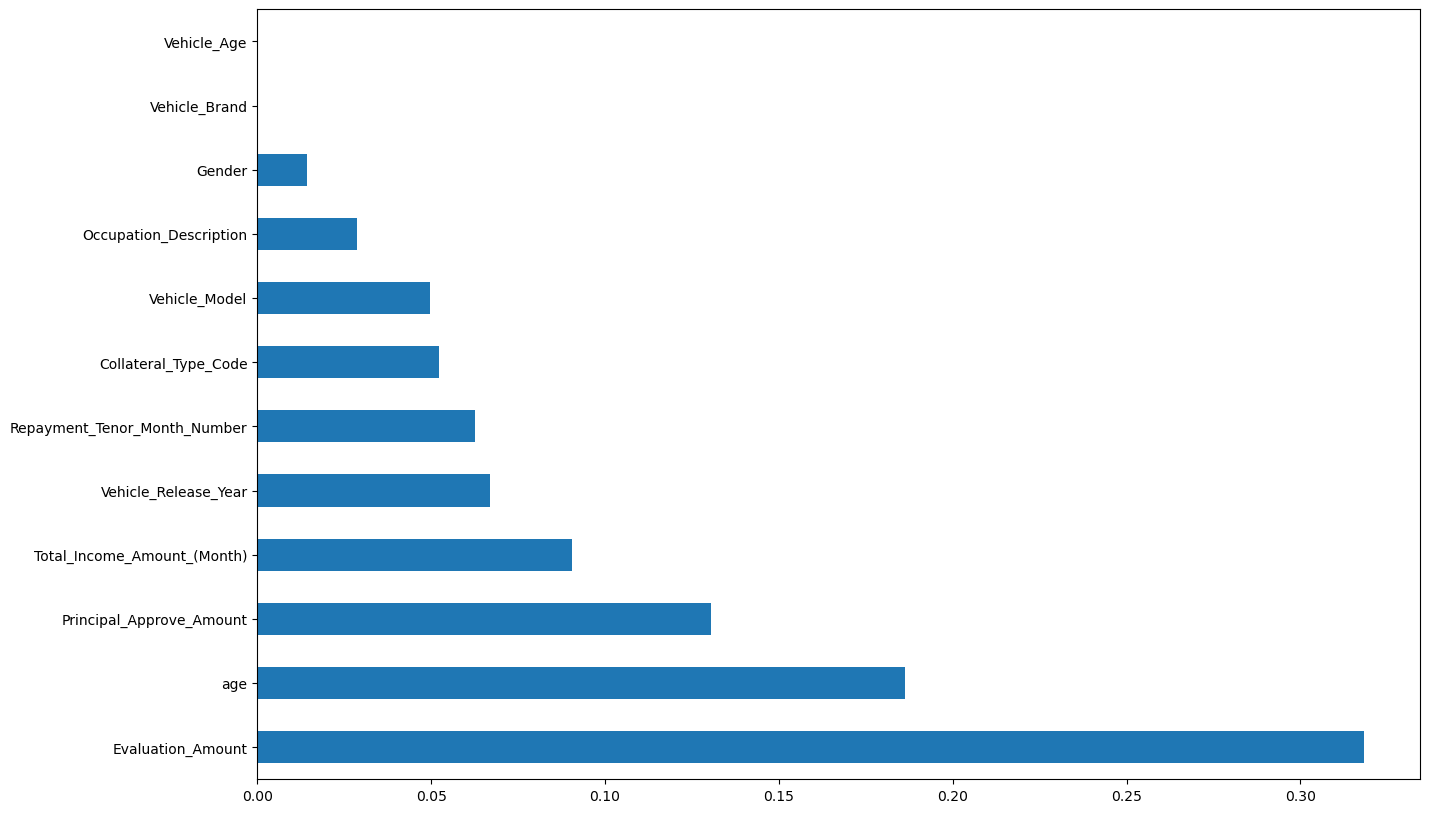

In [224]:
plt.figure(figsize=(15,10))
fs.plot(kind='barh')

In [225]:
from sklearn.tree import DecisionTreeClassifier

#max_depth=5, min_samples_split=4, random_state=101

model = DecisionTreeClassifier(criterion='entropy',max_depth = 15, min_samples_split = 5, min_samples_leaf = 1, random_state=101)
classifier = model.fit(X_resampled,y_resampled)
classifier

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_split=5,
                       random_state=101)

In [226]:
# #prediction
y_pred = classifier.predict(X_test)

from sklearn import metrics
#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred)*100)

score = cross_val_score(model, X, y, cv=10)
print(score)
print("Cross Validation mean is ", np.mean(score)*100)
print("Cross Validation std is ", np.std(score)*100)

Accuracy Score: 57.380254154447705
[0.94428152 0.95601173 0.97360704 0.95601173 0.96774194 0.96187683
 0.95014663 0.96187683 0.95894428 0.95307918]
Cross Validation mean is  95.83577712609971
Cross Validation std is  0.806318304097801


In [227]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_pred, y_test)
print('Classification report  \n',cr)

Confusion matrix : 
 [[  4   3]
 [433 583]]
Classification report  
               precision    recall  f1-score   support

         NPL       0.57      0.01      0.02       437
          PL       0.57      0.99      0.73       586

    accuracy                           0.57      1023
   macro avg       0.57      0.50      0.37      1023
weighted avg       0.57      0.57      0.42      1023



c:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


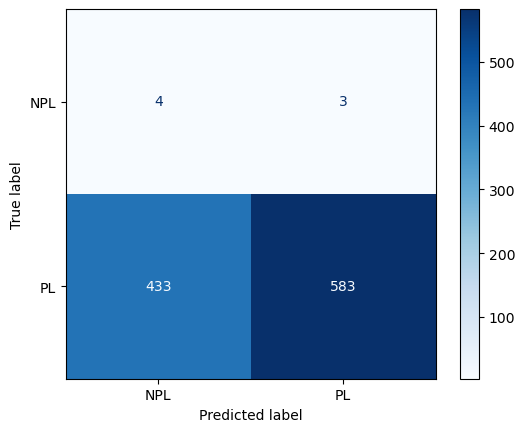

In [228]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(classifier, X_test, y_test, cmap='Blues', values_format='d')

c:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


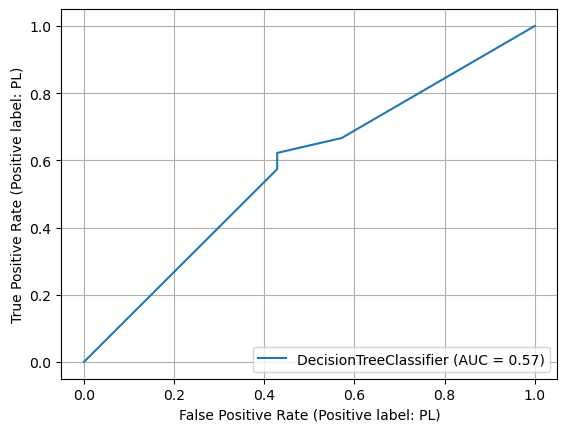

In [229]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier, X_test, y_test)
plt.grid()

#### Prunning

In [230]:
# Create Decision Tree classifer object
# Train Decision Tree Classifer
classifier = DecisionTreeClassifier(criterion='entropy',max_depth = 15, min_samples_split = 5, min_samples_leaf = 1, random_state=101)
#Predict the response for test dataset
classifier = classifier.fit(X_resampled, y_resampled)
# Model Accuracy, how often is the classifier correct?
y_pred = classifier.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)

score = cross_val_score(model, X, y, cv=10)
print(score)
print("Cross Validation mean is ", np.mean(score)*100)
print("Cross Validation stdis ", np.std(score)*100)

Accuracy: 57.380254154447705
[0.94428152 0.95601173 0.97360704 0.95601173 0.96774194 0.96187683
 0.95014663 0.96187683 0.95894428 0.95307918]
Cross Validation mean is  95.83577712609971
Cross Validation stdis  0.806318304097801


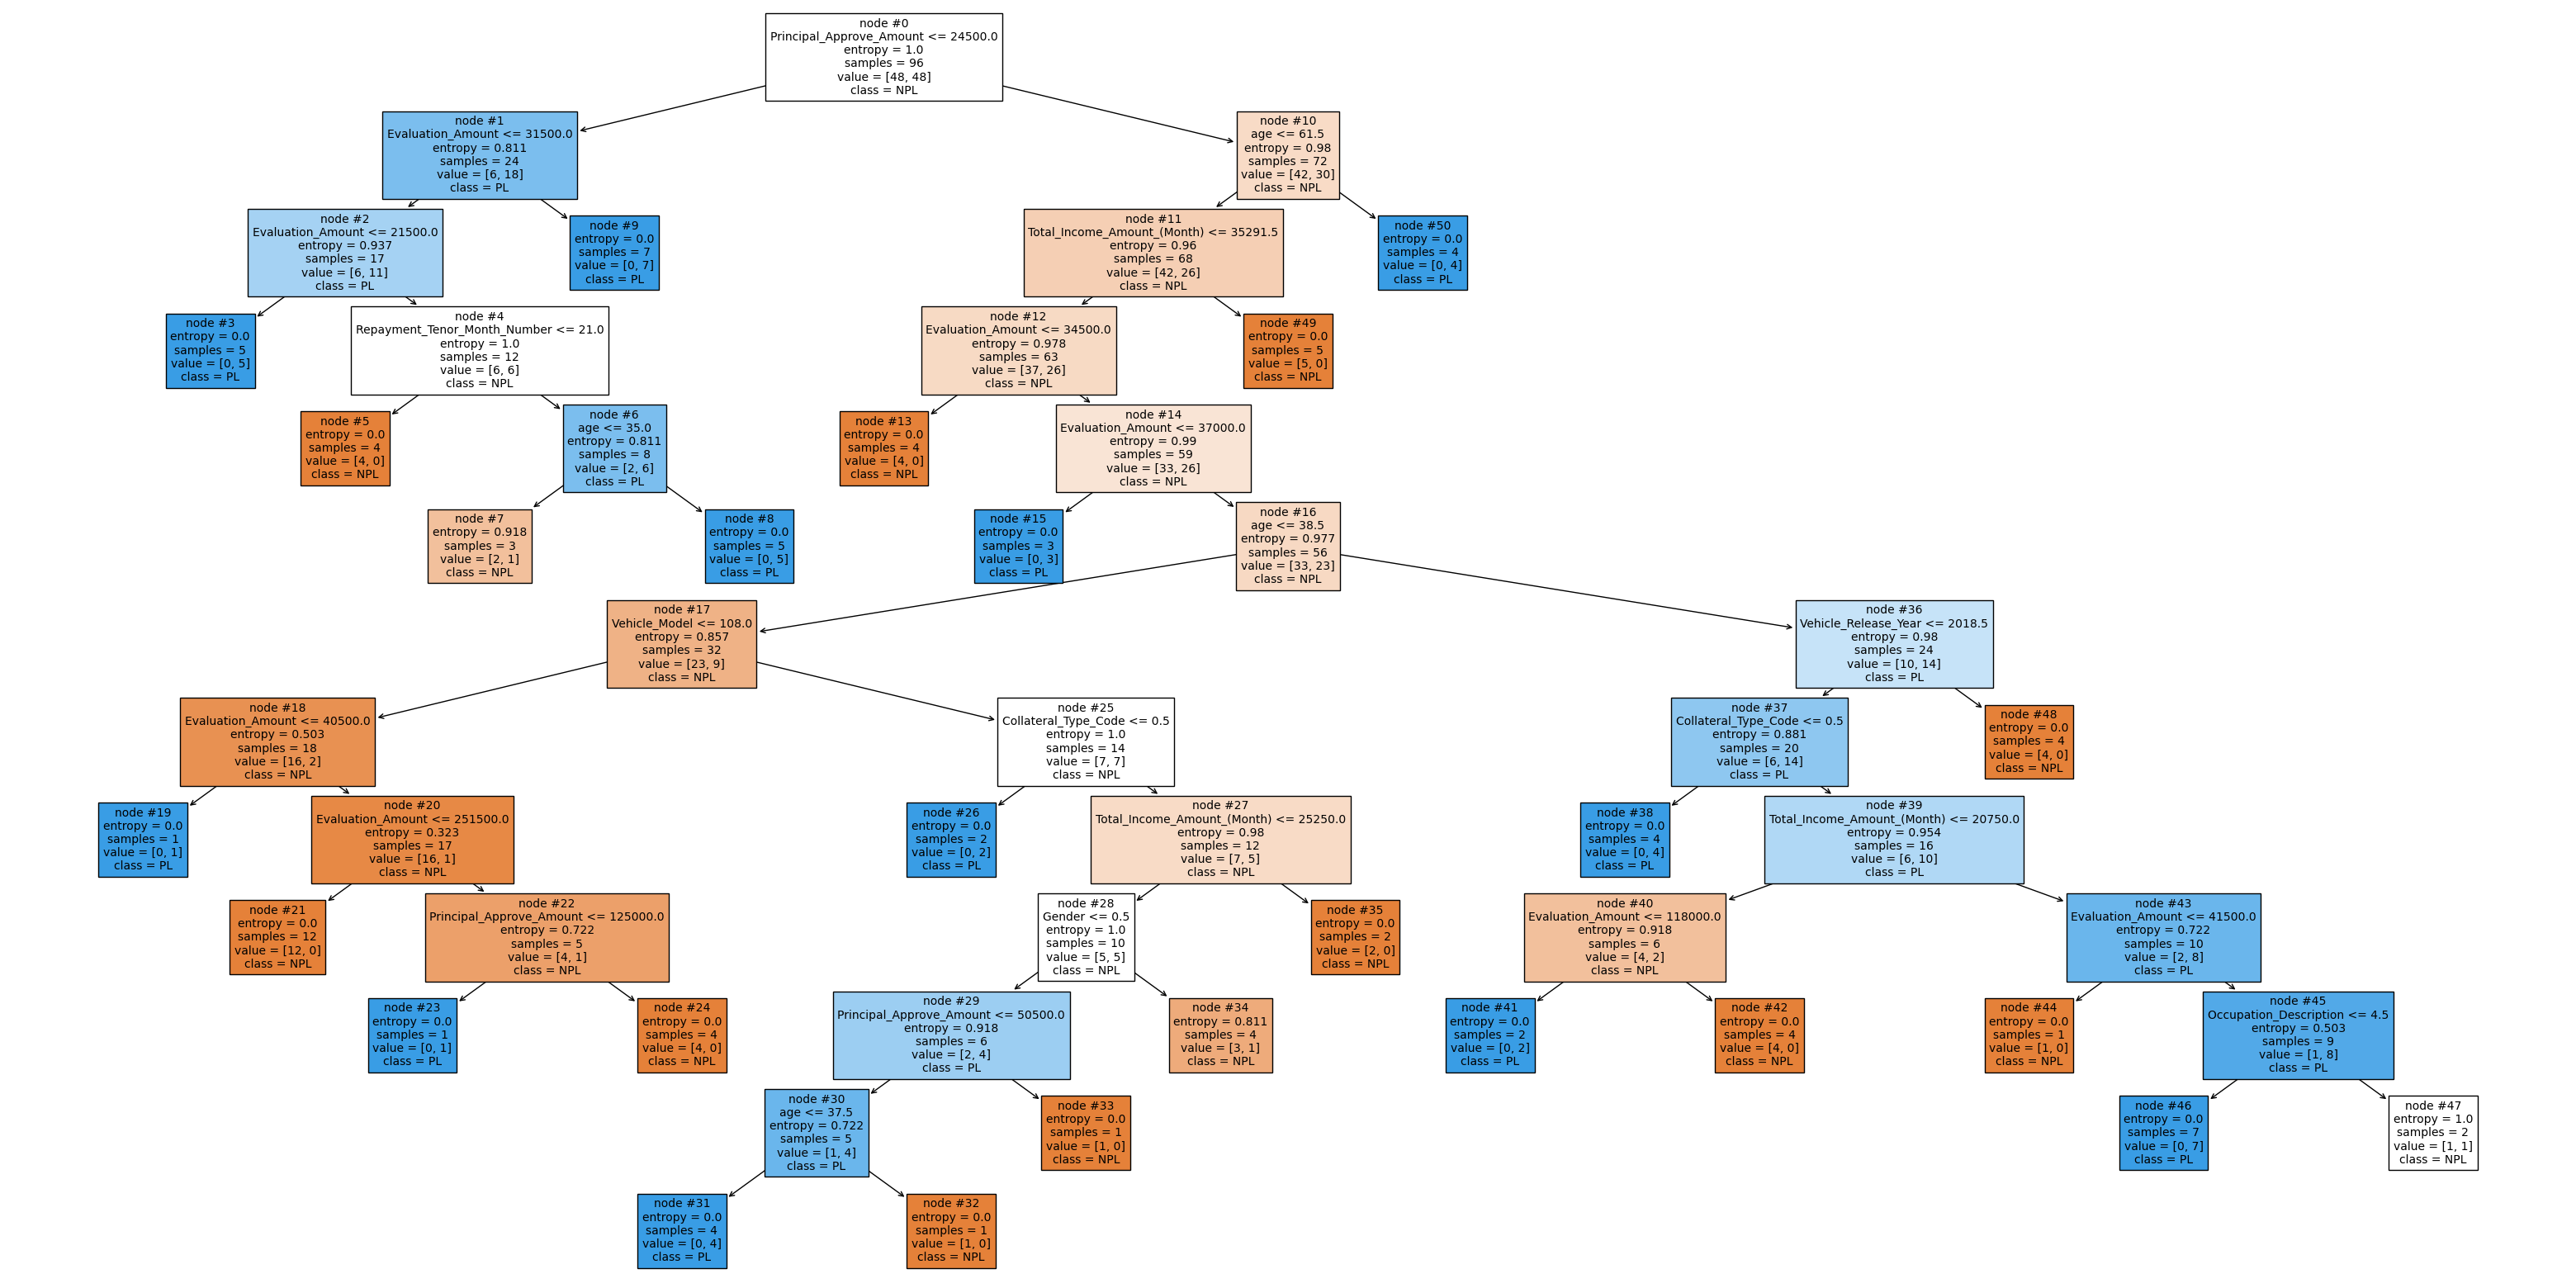

In [231]:
from sklearn import tree
fig = plt.figure(figsize=(40,20))
_ = tree.plot_tree(classifier, 
                   feature_names=['Principal_Approve_Amount', 'Repayment_Tenor_Month_Number', 'Gender', 'Occupation_Description',
       'Total_Income_Amount_(Month)', 'Collateral_Type_Code', 'Vehicle_Brand','Vehicle_Model','Vehicle_Release_Year',
       'Evaluation_Amount','age','Vehicle_Age'],
                   class_names=['NPL','PL'],
                   filled=True,node_ids=True, fontsize=10)

In [232]:
import graphviz

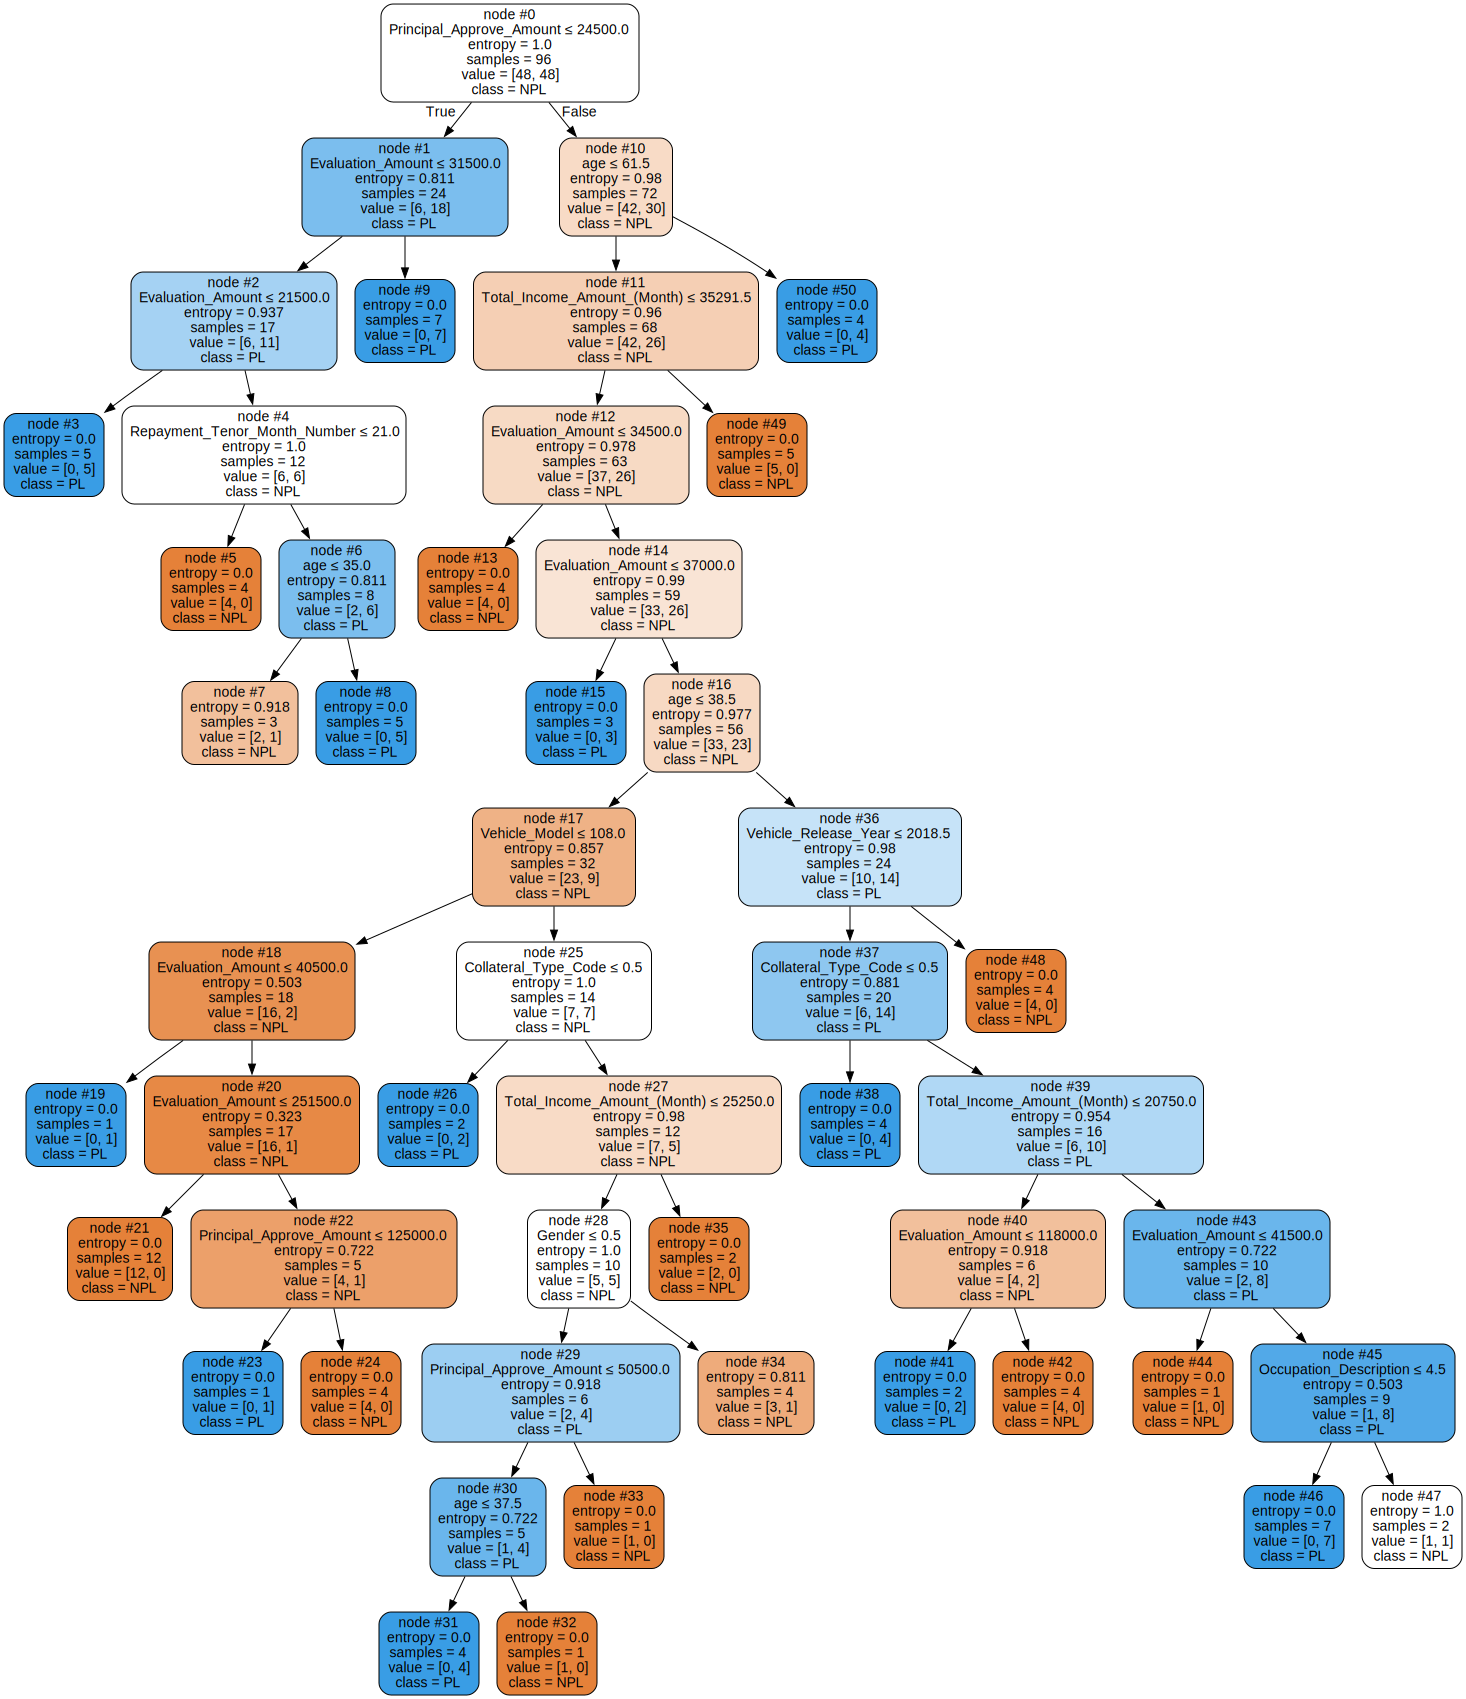

In [233]:
dot_data = tree.export_graphviz(classifier, out_file=None,
                                feature_names=['Principal_Approve_Amount', 'Repayment_Tenor_Month_Number', 'Gender', 'Occupation_Description',
       'Total_Income_Amount_(Month)', 'Collateral_Type_Code', 'Vehicle_Brand','Vehicle_Model','Vehicle_Release_Year',
       'Evaluation_Amount','age','Vehicle_Age'],
                                class_names=['NPL','PL'],
                                filled=True,node_ids=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [234]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_pred, y_test)
print('Classification report  \n',cr)

Confusion matrix : 
 [[  4   3]
 [433 583]]
Classification report  
               precision    recall  f1-score   support

         NPL       0.57      0.01      0.02       437
          PL       0.57      0.99      0.73       586

    accuracy                           0.57      1023
   macro avg       0.57      0.50      0.37      1023
weighted avg       0.57      0.57      0.42      1023



c:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


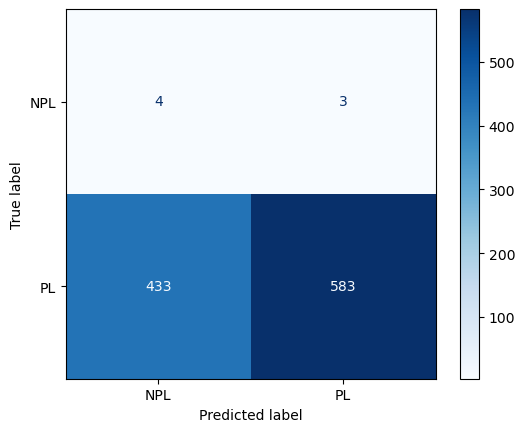

In [235]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(classifier, X_test, y_test, cmap='Blues', values_format='d')

c:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


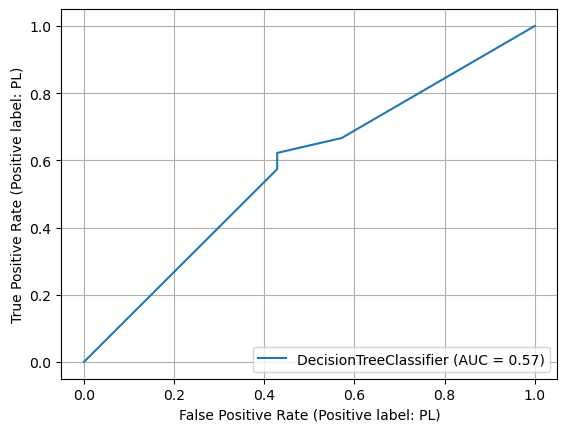

In [236]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier, X_test, y_test)
plt.grid()

### Random Forest

In [237]:
X_resampled.head(1)

Principal_Approve_Amount  Repayment_Tenor_Month_Number  Gender  \
0                   25000.0                            36       0   

   Occupation_Description  Total_Income_Amount_(Month)  Collateral_Type_Code  \
0                       6                       9000.0                     1   

   Vehicle_Brand  Vehicle_Model  Vehicle_Release_Year  Evaluation_Amount  age  \
0              5            190                  2013              34000   48   

   Vehicle_Age  
0           10

In [238]:
X_new = classifier.predict([[51000,36,0,10,10000,1,5,135,2018,64500,28,5]])

c:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [239]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=250, random_state=101)
rdf_classifier = model.fit(X_resampled,y_resampled)
rdf_classifier

RandomForestClassifier(n_estimators=250, random_state=101)

### Feature Importance

In [240]:
rdf_classifier.feature_importances_

array([0.15879623, 0.05413315, 0.02822839, 0.05311151, 0.12494764,
       0.01823537, 0.03959955, 0.06765566, 0.09469749, 0.12898567,
       0.13115283, 0.10045649])

In [241]:
fs = pd.Series(rdf_classifier.feature_importances_, index=X_resampled.columns).sort_values(
    ascending=False
)
fs

Principal_Approve_Amount        0.158796
age                             0.131153
Evaluation_Amount               0.128986
Total_Income_Amount_(Month)     0.124948
Vehicle_Age                     0.100456
Vehicle_Release_Year            0.094697
Vehicle_Model                   0.067656
Repayment_Tenor_Month_Number    0.054133
Occupation_Description          0.053112
Vehicle_Brand                   0.039600
Gender                          0.028228
Collateral_Type_Code            0.018235
dtype: float64

In [242]:
fs.sum()

1.0000000000000002

<AxesSubplot:>

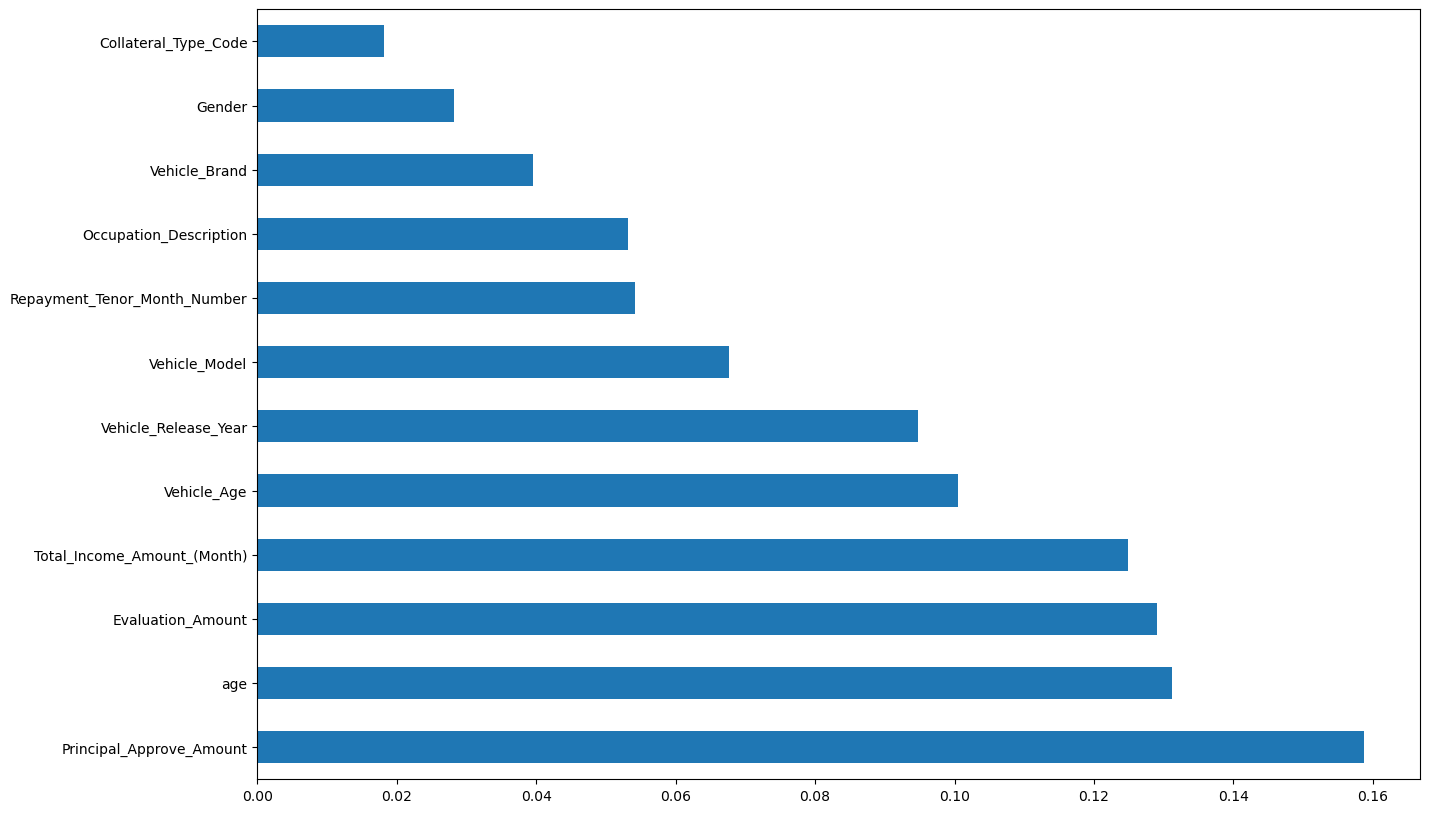

In [243]:
plt.figure(figsize=(15,10))
fs.plot(kind='barh')

In [244]:
# #pip install shap

# import shap

In [245]:
# explainer = shap.TreeExplainer(rdf_classifier)
# shap_values = explainer.shap_values(X_resampled)

In [246]:
# choosen_instance = X_resampled.loc[[50]]
# shap_values = explainer.shap_values(choosen_instance)
# shap.initjs()
# shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

In [247]:
# shap.summary_plot(shap_values, X_resampled, plot_type="bar")

In [248]:
# shap.summary_plot(shap_values, X_resampled)

In [249]:
#prediction
y_pred = rdf_classifier.predict(X_test)
from sklearn import metrics
#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred)*100)

score = cross_val_score(model, X_resampled, y_resampled, cv=10)
print(score)
print("Cross Validation mean is ", np.mean(score)*100)
print("Cross Validation std is ", np.std(score)*100)

Accuracy Score: 60.410557184750736
[0.5        0.5        0.8        0.7        0.8        0.2
 0.66666667 0.33333333 0.55555556 0.88888889]
Cross Validation mean is  59.44444444444444
Cross Validation std is  20.752807336494957


In [250]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_pred, y_test)
print('Classification report  \n',cr)

Confusion matrix : 
 [[  5   2]
 [403 613]]
Classification report  
               precision    recall  f1-score   support

         NPL       0.71      0.01      0.02       408
          PL       0.60      1.00      0.75       615

    accuracy                           0.60      1023
   macro avg       0.66      0.50      0.39      1023
weighted avg       0.65      0.60      0.46      1023



c:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


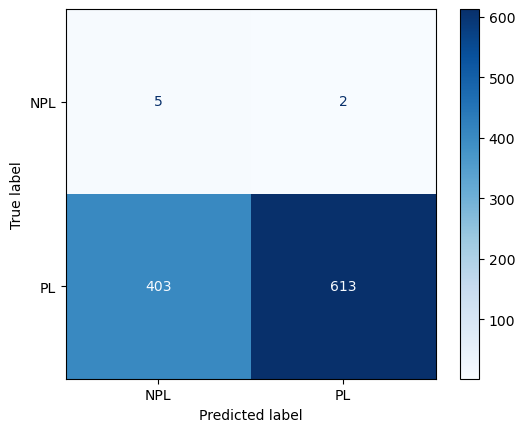

In [251]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(rdf_classifier, X_test, y_test, cmap='Blues', values_format='d')

c:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


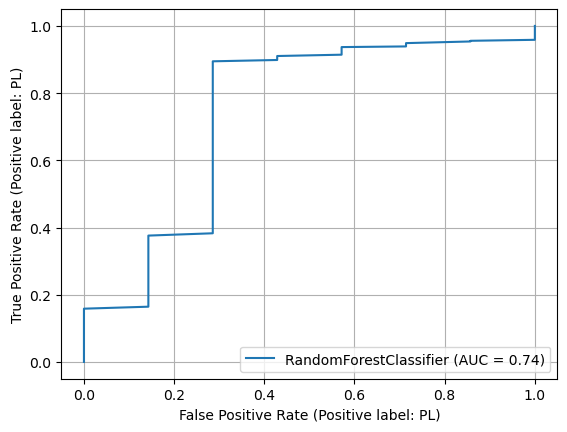

In [252]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rdf_classifier, X_test, y_test)
plt.grid()

#### Trial and Error ทำ Hyperparemeter Tuning ด้วยการเขียนเอง

In [253]:
# n_estimators = [100, 200, 300]
# max_features = ['sqrt', 'log2', None]
# max_depth = [5, 10, 15]
# min_samples_split = [2, 5, 10]
# min_samples_leaf = [1, 2, 4]
# max_leaf_nodes = [3, 6, 9]
# criterion = ['gini', 'entropy']

# กำหนดค่า parameter ที่ต้องการปรับค่า
criterion = ['gini', 'entropy']
n_estimators = [100, 200, 300, 400]
max_depth = [None, 5, 10, 20]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

# กำหนดค่าเริ่มต้นของ parameter
best_score = 0
best_params = {}

# ลูปผ่าน parameter แต่ละตัว
for c in criterion:
    for n in n_estimators:
        for d in max_depth:
            for s in min_samples_split:
                for l in min_samples_leaf:
                    # สร้าง model และ fit ข้อมูล
                    rf = RandomForestClassifier(criterion=c, n_estimators=n, max_depth=d,
                                                min_samples_split=s, min_samples_leaf=l)
                    rf.fit(X_resampled,y_resampled)

                    # ทำนายผล validation set และคำนวณค่าความแม่นยำ
                    y_pred = rf.predict(X_test)
                    score = accuracy_score(y_test, y_pred)

                    # เลือก parameter ที่ให้ค่าความแม่นยำสูงสุด
                    if score > best_score:
                        best_score = score
                        best_params = {'criterion':c, 'n_estimators': n, 'max_depth': d, 'min_samples_split': s, 'min_samples_leaf': l}

# สร้างโมเดล Random Forest ด้วย parameter ที่ดีที่สุด
rf_best = RandomForestClassifier(criterion=best_params['criterion'], n_estimators=best_params['n_estimators'],
                                 max_depth=best_params['max_depth'], min_samples_split=best_params['min_samples_split'],
                                 min_samples_leaf=best_params['min_samples_leaf'])
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=2)

In [162]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=2,
                       min_samples_split=10, random_state=101)
rdf_classifier = model.fit(X_resampled,y_resampled)
rdf_classifier

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=2,
                       min_samples_split=10, random_state=101)

#### Feature Importance

In [163]:
rdf_classifier.feature_importances_

array([0.17786955, 0.0373075 , 0.02225792, 0.05926285, 0.11552686,
       0.0212088 , 0.03227489, 0.07993922, 0.102092  , 0.13551584,
       0.11942129, 0.09732327])

In [164]:
fs = pd.Series(rdf_classifier.feature_importances_, index=X_resampled.columns).sort_values(
    ascending=False
)
fs

Principal_Approve_Amount        0.177870
Evaluation_Amount               0.135516
age                             0.119421
Total_Income_Amount_(Month)     0.115527
Vehicle_Release_Year            0.102092
Vehicle_Age                     0.097323
Vehicle_Model                   0.079939
Occupation_Description          0.059263
Repayment_Tenor_Month_Number    0.037308
Vehicle_Brand                   0.032275
Gender                          0.022258
Collateral_Type_Code            0.021209
dtype: float64

In [165]:
fs.sum()

0.9999999999999999

<AxesSubplot:>

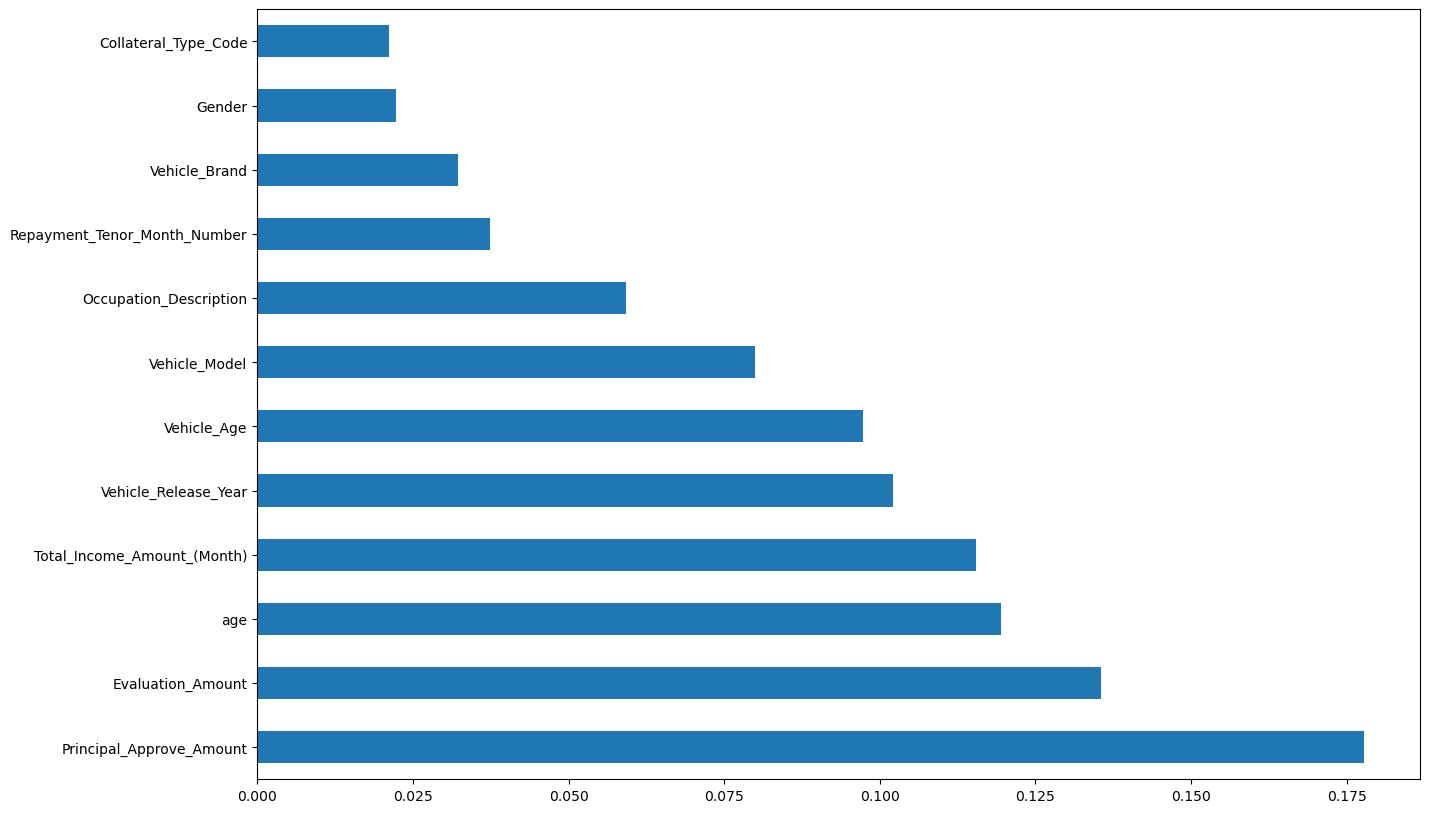

In [166]:
plt.figure(figsize=(15,10))
fs.plot(kind='barh')

In [167]:
#prediction
y_pred = rdf_classifier.predict(X_test)
from sklearn import metrics
#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred)*100)

score = cross_val_score(model, X_resampled, y_resampled, cv=10)
print(score)
print("Cross Validation mean is ", np.mean(score)*100)
print("Cross Validation std is ", np.std(score)*100)

Accuracy Score: 60.01955034213099
[0.5        0.5        0.8        0.7        0.6        0.2
 0.55555556 0.55555556 0.44444444 0.55555556]
Cross Validation mean is  54.11111111111111
Cross Validation std is  15.01480750607361


In [168]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_pred, y_test)
print('Classification report  \n',cr)

Confusion matrix : 
 [[  5   2]
 [407 609]]
Classification report  
               precision    recall  f1-score   support

         NPL       0.71      0.01      0.02       412
          PL       0.60      1.00      0.75       611

    accuracy                           0.60      1023
   macro avg       0.66      0.50      0.39      1023
weighted avg       0.65      0.60      0.46      1023



c:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


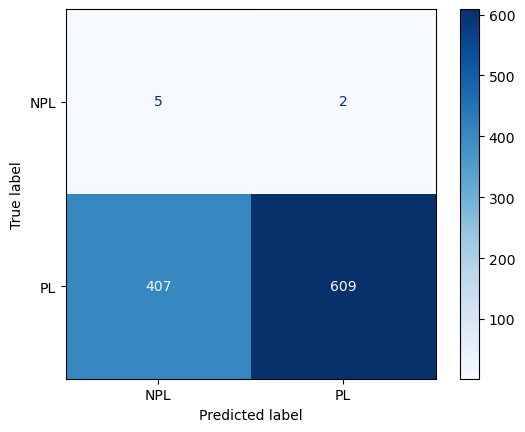

In [169]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(model, X_test, y_test, cmap='Blues', values_format='d')

c:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


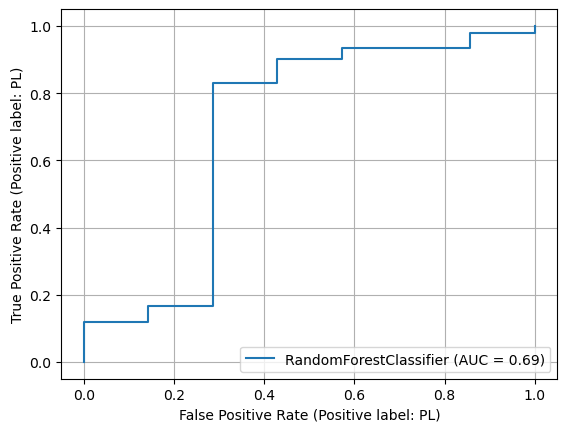

In [170]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rdf_classifier, X_test, y_test)
plt.grid()

### Export Model to Streamlit

In [171]:
import pickle

In [172]:
pickle_out = open("RandomForest.pkl", "wb")
pickle.dump(rdf_classifier, pickle_out)
pickle_out.close()

### Hyperparameter Tuning- GridSearchCV

In [173]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score

In [174]:
# # Generate a synthetic dataset
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_classes=2, random_state=101)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [175]:
# Define the hyperparameters to be tuned
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [3, 6, 9],
    'criterion':['gini', 'entropy']
}

In [176]:
# Instantiate a random forest classifier
rf = RandomForestClassifier(random_state=101)

In [177]:
# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, n_jobs=-1, scoring='f1_macro')
grid_search.fit(X_resampled, y_resampled)
print(grid_search.best_estimator_)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       max_leaf_nodes=6, min_samples_leaf=4, n_estimators=200,
                       random_state=101)


In [178]:
# Print the best hyperparameters and corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_*100)

# Make predictions on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the performance of the best model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print("Accuracy: {:.2f}%".format(accuracy*100))
print("F1 score: {:.2f}".format(f1))

Best parameters:  {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 6, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best score:  60.97582972582973
Accuracy: 57.58%
F1 score: 0.38


In [179]:
import pandas as pd

grid_results = pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
grid_results.head()

criterion  max_depth max_features  max_leaf_nodes  min_samples_leaf  \
0      gini          5         sqrt               3                 1   
1      gini          5         sqrt               3                 1   
2      gini          5         sqrt               3                 1   
3      gini          5         sqrt               3                 1   
4      gini          5         sqrt               3                 1   

   min_samples_split  n_estimators  Accuracy  
0                  2           100  0.526061  
1                  2           200  0.558939  
2                  2           300  0.547803  
3                  5           100  0.526061  
4                  5           200  0.558939

In [180]:
grid_contour = grid_results.groupby(['max_features','n_estimators']).mean()
grid_contour

max_depth  max_leaf_nodes  min_samples_leaf  \
max_features n_estimators                                                
log2         100                10.0             6.0          2.333333   
             200                10.0             6.0          2.333333   
             300                10.0             6.0          2.333333   
sqrt         100                10.0             6.0          2.333333   
             200                10.0             6.0          2.333333   
             300                10.0             6.0          2.333333   

                           min_samples_split  Accuracy  
max_features n_estimators                               
log2         100                    5.666667  0.557973  
             200                    5.666667  0.564283  
             300                    5.666667  0.556641  
sqrt         100                    5.666667  0.557973  
             200                    5.666667  0.564283  
             300                    5.666667  0.556641

In [181]:
# grid_reset = grid_contour.reset_index()
# grid_reset.columns = ['max_features', 'n_estimators', 'Accuracy']
# grid_pivot = grid_reset.pivot('max_features', 'n_estimators')
# grid_pivot

In [182]:
model_grid = RandomForestClassifier(criterion='gini', max_depth=10, max_features='sqrt', max_leaf_nodes=9,
                       min_samples_leaf=2, min_samples_split=10,
                       n_estimators=300, random_state=101)
model_grid.fit(X_resampled, y_resampled)
y_pred_grid = model.predict(X_test)
print(classification_report(y_pred_grid, y_test))

              precision    recall  f1-score   support

         NPL       0.71      0.01      0.02       412
          PL       0.60      1.00      0.75       611

    accuracy                           0.60      1023
   macro avg       0.66      0.50      0.39      1023
weighted avg       0.65      0.60      0.46      1023



c:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


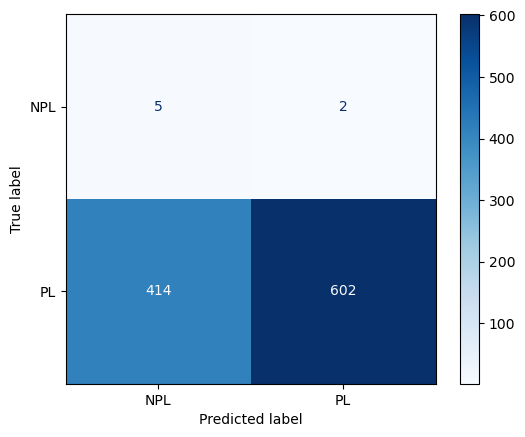

In [183]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(model_grid, X_test, y_test, cmap='Blues', values_format='d')

c:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


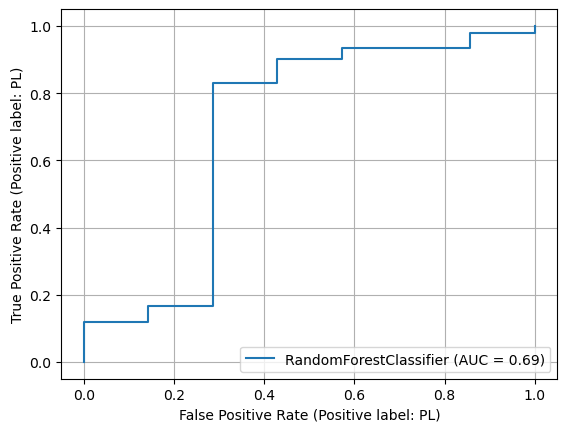

In [184]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rdf_classifier, X_test, y_test)
plt.grid()

### Export Model with Hypertuning GrifSearchCV

In [185]:
import pickle

In [186]:
pickle_out = open("RandomForest-GridSearchCV.pkl", "wb")
pickle.dump(rdf_classifier, pickle_out)
pickle_out.close()

### Hyperparameter Tuning- RandomizedSearchCV

In [187]:
from sklearn.model_selection import RandomizedSearchCV

In [188]:
random_search = RandomizedSearchCV(RandomForestClassifier(),
                                   param_grid)
random_search.fit(X_resampled, y_resampled)
print(random_search.best_estimator_)
print("Accuracy: {:.2f}%".format(accuracy*100))

RandomForestClassifier(max_depth=5, max_features='sqrt', max_leaf_nodes=3,
                       min_samples_split=5, n_estimators=300)
Accuracy: 57.58%


In [189]:
# Print the best hyperparameters and corresponding score
print("Best parameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_*100)

model_random = RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=9, n_estimators=200, random_state=101)
model_random.fit(X_resampled, y_resampled)
y_pred_rand = model.predict(X_test)
print("Accuracy: {:.2f}%".format(accuracy*100))
print(classification_report(y_pred_rand, y_test))

Best parameters:  {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_leaf_nodes': 3, 'max_features': 'sqrt', 'max_depth': 5, 'criterion': 'gini'}
Best score:  60.57894736842104
Accuracy: 57.58%
              precision    recall  f1-score   support

         NPL       0.71      0.01      0.02       412
          PL       0.60      1.00      0.75       611

    accuracy                           0.60      1023
   macro avg       0.66      0.50      0.39      1023
weighted avg       0.65      0.60      0.46      1023



c:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


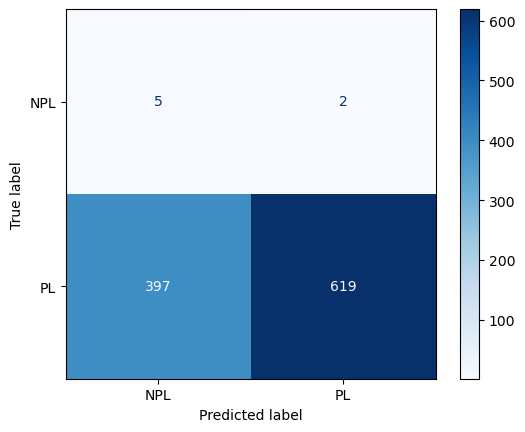

In [190]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(model_random, X_test, y_test, cmap='Blues', values_format='d')

### Export Model with Hypertuning RandomizedSearchCV

In [191]:
pickle_out = open("RandomForest-RandomizedSearchCV.pkl", "wb")
pickle.dump(rdf_classifier, pickle_out)
pickle_out.close()

### Voting classifier Model

In [192]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [193]:
# สร้างโมเดลต่าง ๆ ที่จะนำมาใช้ใน Voting Classifier
# lr = LogisticRegression(random_state=42)
# svm = SVC(random_state=42)
rf = RandomForestClassifier(random_state=101)
tree = DecisionTreeClassifier(random_state=101)

In [194]:
# กำหนด Voting Classifier โดยให้ใช้โมเดลทั้ง 3 โมเดลที่สร้างขึ้นมาก่อนหน้านี้
voting_clf = VotingClassifier(
    estimators=[('rf', rf), ('tree', tree)],
    voting='hard' # กำหนดว่าจะให้ใช้การ Vote ด้วยการนับจำนวนโมเดลที่ทำนายถูกมากกว่า (hard)
)

In [195]:
# # สร้างข้อมูลตัวอย่าง
# X = [[0, 0], [1, 1]]
# y = [0, 1]

X = cols
       # test approve กับ ที่ปล่อย
# X2 = df[['Principal Approve Amount', 'Principal Amount',
#        'Repayment Tenor Month Number', 'Gender', 'Occupation Description',
#        'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand',
#        'Vehicle Release Year', 'age', 'Vehicle Age']]
y = df['DPD']

In [196]:
# สอนโมเดล
voting_clf.fit(X, y)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=101)),
                             ('tree',
                              DecisionTreeClassifier(random_state=101))])

In [197]:
# # ทดสอบโมเดล
# print(voting_clf.predict([[2., 2.], [-1, -2]]))

print(voting_clf.predict(X))

['PL' 'PL' 'PL' ... 'NPL' 'NPL' 'NPL']
